#Generative Polypeptide Relator Deluxo
Dan Ehlers pinballsurgeon@gmail.com

Generalized Sequence graph network pre-processor
:
1. DEMO'd PROTEINS - Photosystem I assembly factor PSA3, chloroplastic
2. Sequence to latent space layered graph networks


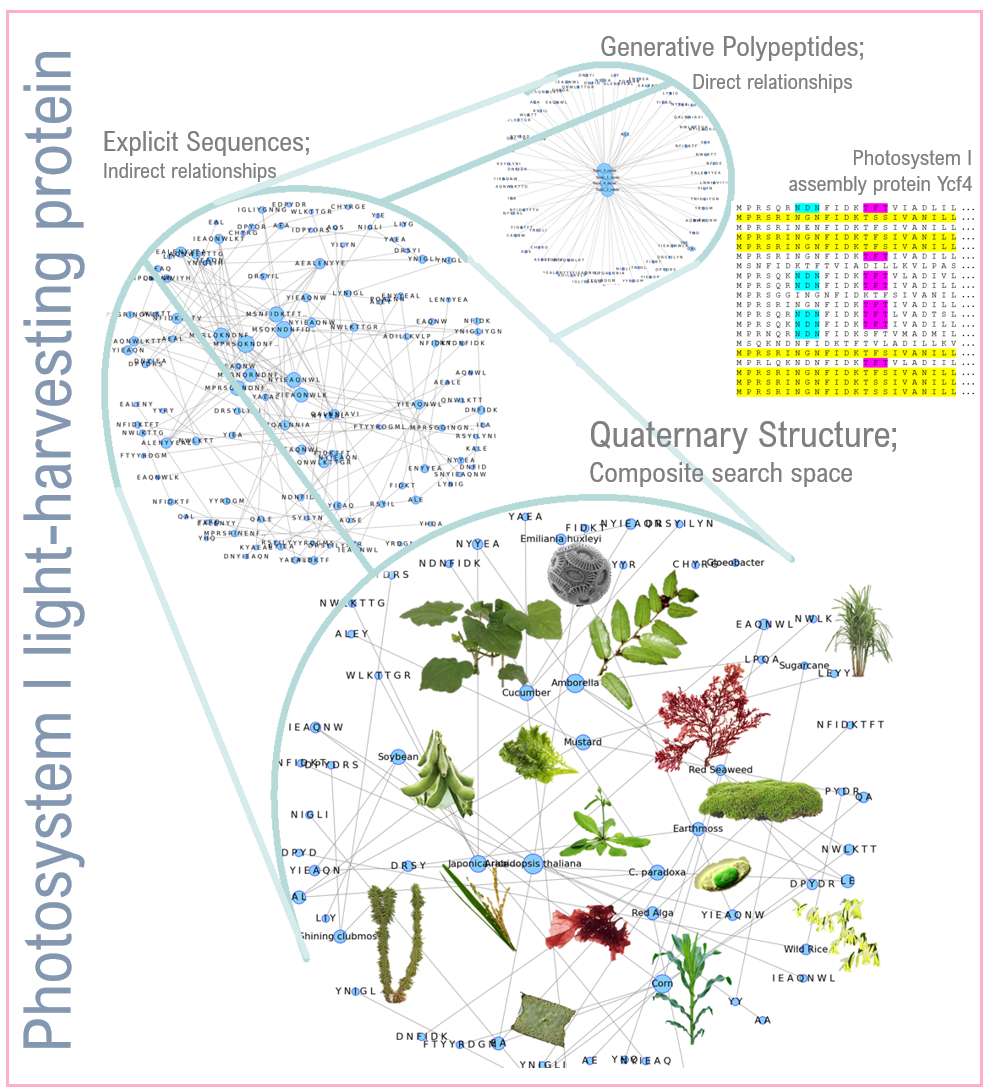

Dan Ehlers [pinballsurgeon@gmail.com]

Using LDA (Latent Dirichlet association) and (NMF) Non-negative matrix factorization for dynamic, amino acid sequence topic extraction. LDA is a probabilistic model and NMF is a matrix factorization and multivariate analysis technique.  The evolving aim is to allow dynamic synergeies within sequence/peptide sizes to be identified and tuned holistically, producing some useful mechanism yet to be determined.


In [66]:
from time import time
import matplotlib.pyplot as plt
import pandas as pd
import math

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

import networkx as nx
import networkx.algorithms.isomorphism as iso
from networkx.algorithms.community.modularity_max import greedy_modularity_communities

# LDA / NMF config
n_samples = 2000
n_features = 1000
n_components = 5
n_top_words = 10

# these are how many amino acids you want to be in each tested peptide length
ngram_ranges = [9, 8, 7, 6, 5, 4, 3, 2, 1]

# current data source format
#     COL1 - FASTA SEQUENCE
#     COL2 - PROTEIN/PEPTIDE NAME
#     COL3 - ORGIN SPECIES

df = pd.read_csv("protein_lhc_deep.csv",)


In [67]:
def plot_top_words(model, feature_names, n_top_words, title):
    
    buf_df=pd.DataFrame()
    fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]


        # build resulting dataframe
        topic_df_name = f"Topic_{topic_idx +1}"
        buf_df[f"{topic_df_name}_node"] = top_features
        buf_df[f"{topic_df_name}_weight"] = weights


        # build horizontal bar chart per topic
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

    return buf_df

In [68]:
# standarized graph network receiver and print
def build_graph_network(df_slice):

  # build graph 
  G = nx.from_pandas_edgelist(df_slice
                            ,'Source'          # parent
                            ,'Target'          # child
                            , ['Weight'])      # relationship


  # define plot area
  plt.figure(3,figsize=(22,22)) 

  # calc degrees per node
  d = dict(G.degree)

  # visualize graph 
  nx.draw(G         
      ,nx.kamada_kawai_layout(G)               
      ,with_labels=True
      ,edge_color='gray'
      ,node_color='lightskyblue'
      ,node_size=[v * 100 for v in d.values()]
      ,font_size=22)
  
  ax = plt.gca() # to get the current axis
  ax.collections[0].set_edgecolor("blue")

  return G

In [69]:
# tokenize each sequence, here we asumme each amino acid in series
buf_list = []

for seq in df['protein']:
  buf_string = ''
  for amino in seq:
    buf_string = buf_string + amino + ' '
  buf_list.append(buf_string)
df['protein split'] = buf_list

In [70]:
# samples per species
print('    TOP 10 - sequences per species --')
print(df['species'].value_counts().head(10))
print(''); print('')

# protein name
print('    TOP 10 - sequences per protein name --')
print(df['name'].value_counts().head(10))


    TOP 10 - sequences per species --
Red Seaweed             14
Trieres chinensis       12
Gloeobacter             10
Cucumber                 9
Arabidopsis thaliana     9
Black Pine               8
C. paradoxa              7
Shining clubmoss         7
Corn                     7
Earthmoss                6
Name: species, dtype: int64


    TOP 10 - sequences per protein name --
Photosystem I assembly protein Ycf3               20
Photosystem I reaction center subunit IX          12
Photosystem I reaction center subunit VIII        10
Photosystem I P700 chlorophyll a apoprotein A2     8
Photosystem I P700 chlorophyll a apoprotein A1     7
Photosystem I reaction center subunit II           7
Photosystem I assembly protein Ycf4                7
Photosystem I iron-sulfur center                   7
Photosystem I reaction center subunit III          5
Photosystem I reaction center subunit XII          5
Name: name, dtype: int64





amino acid ngram range of study - (9, 9)
Extracting tf-idf features for NMF...
done in 0.066s.
Extracting tf features for LDA...
done in 0.058s.



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


done in 0.359s.


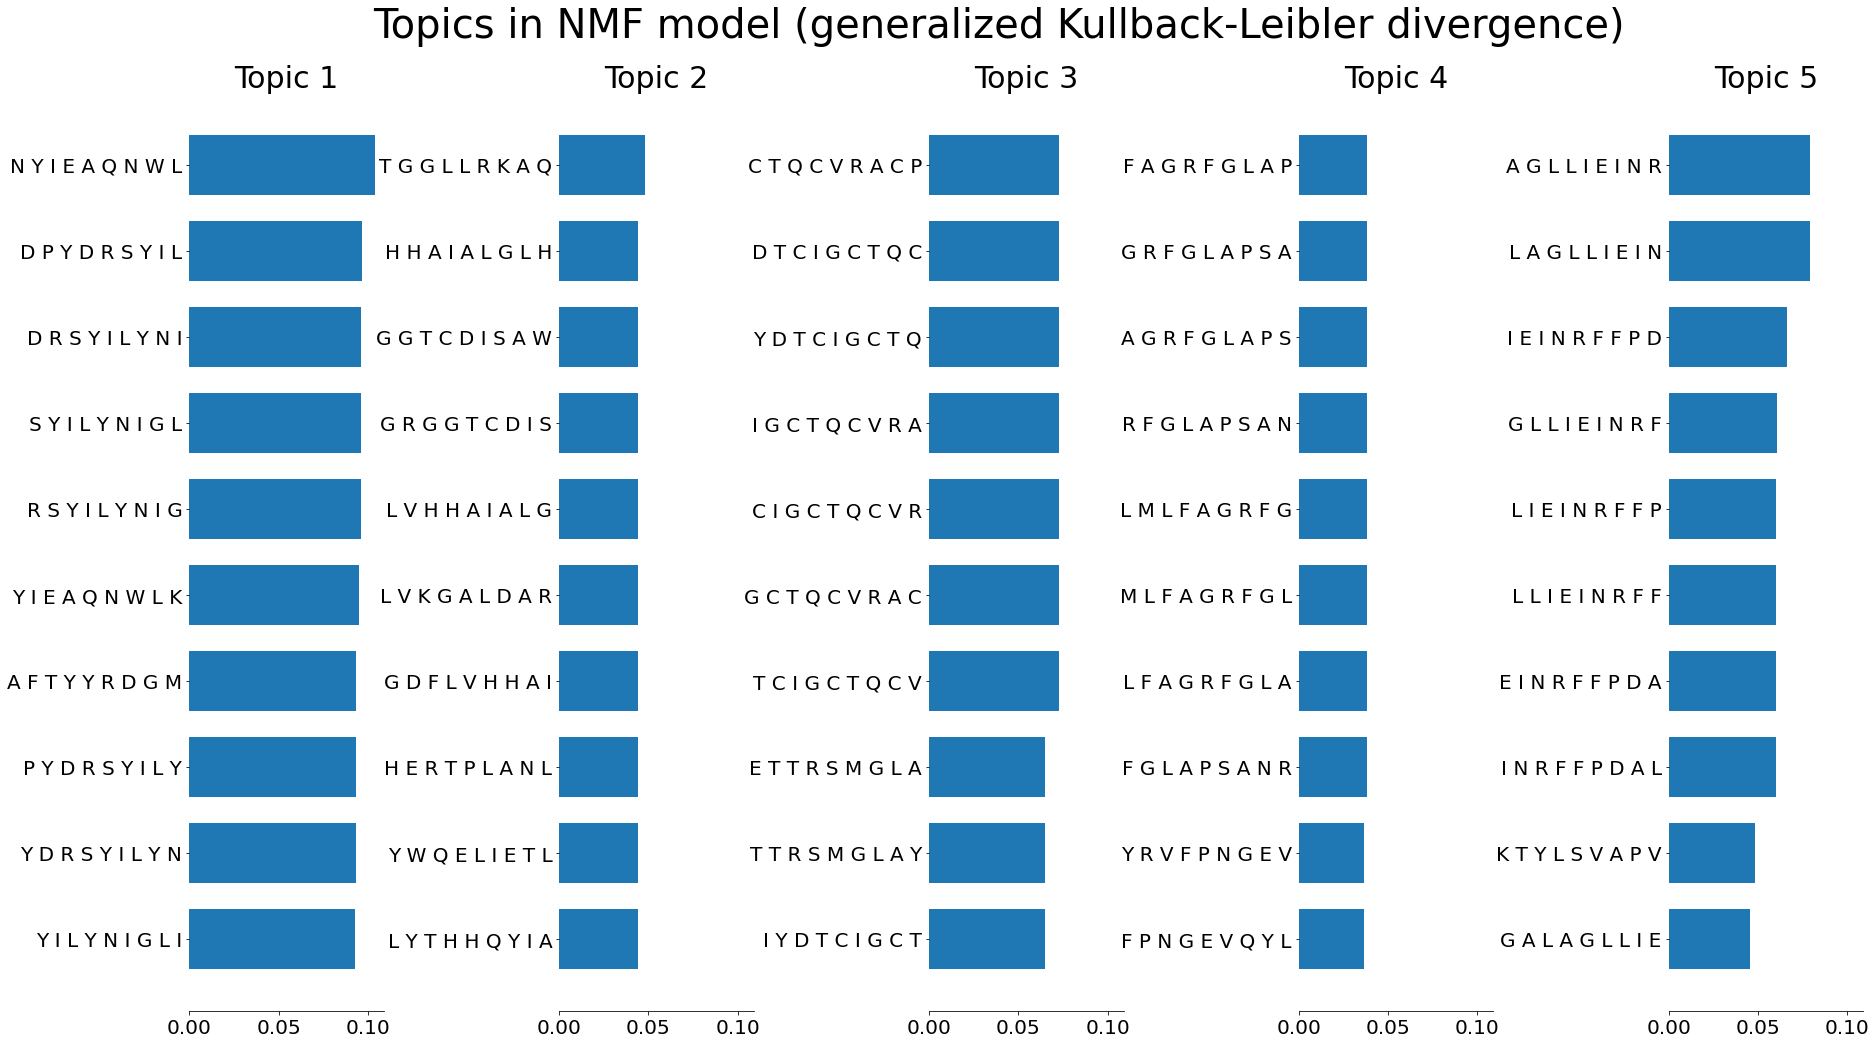



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...


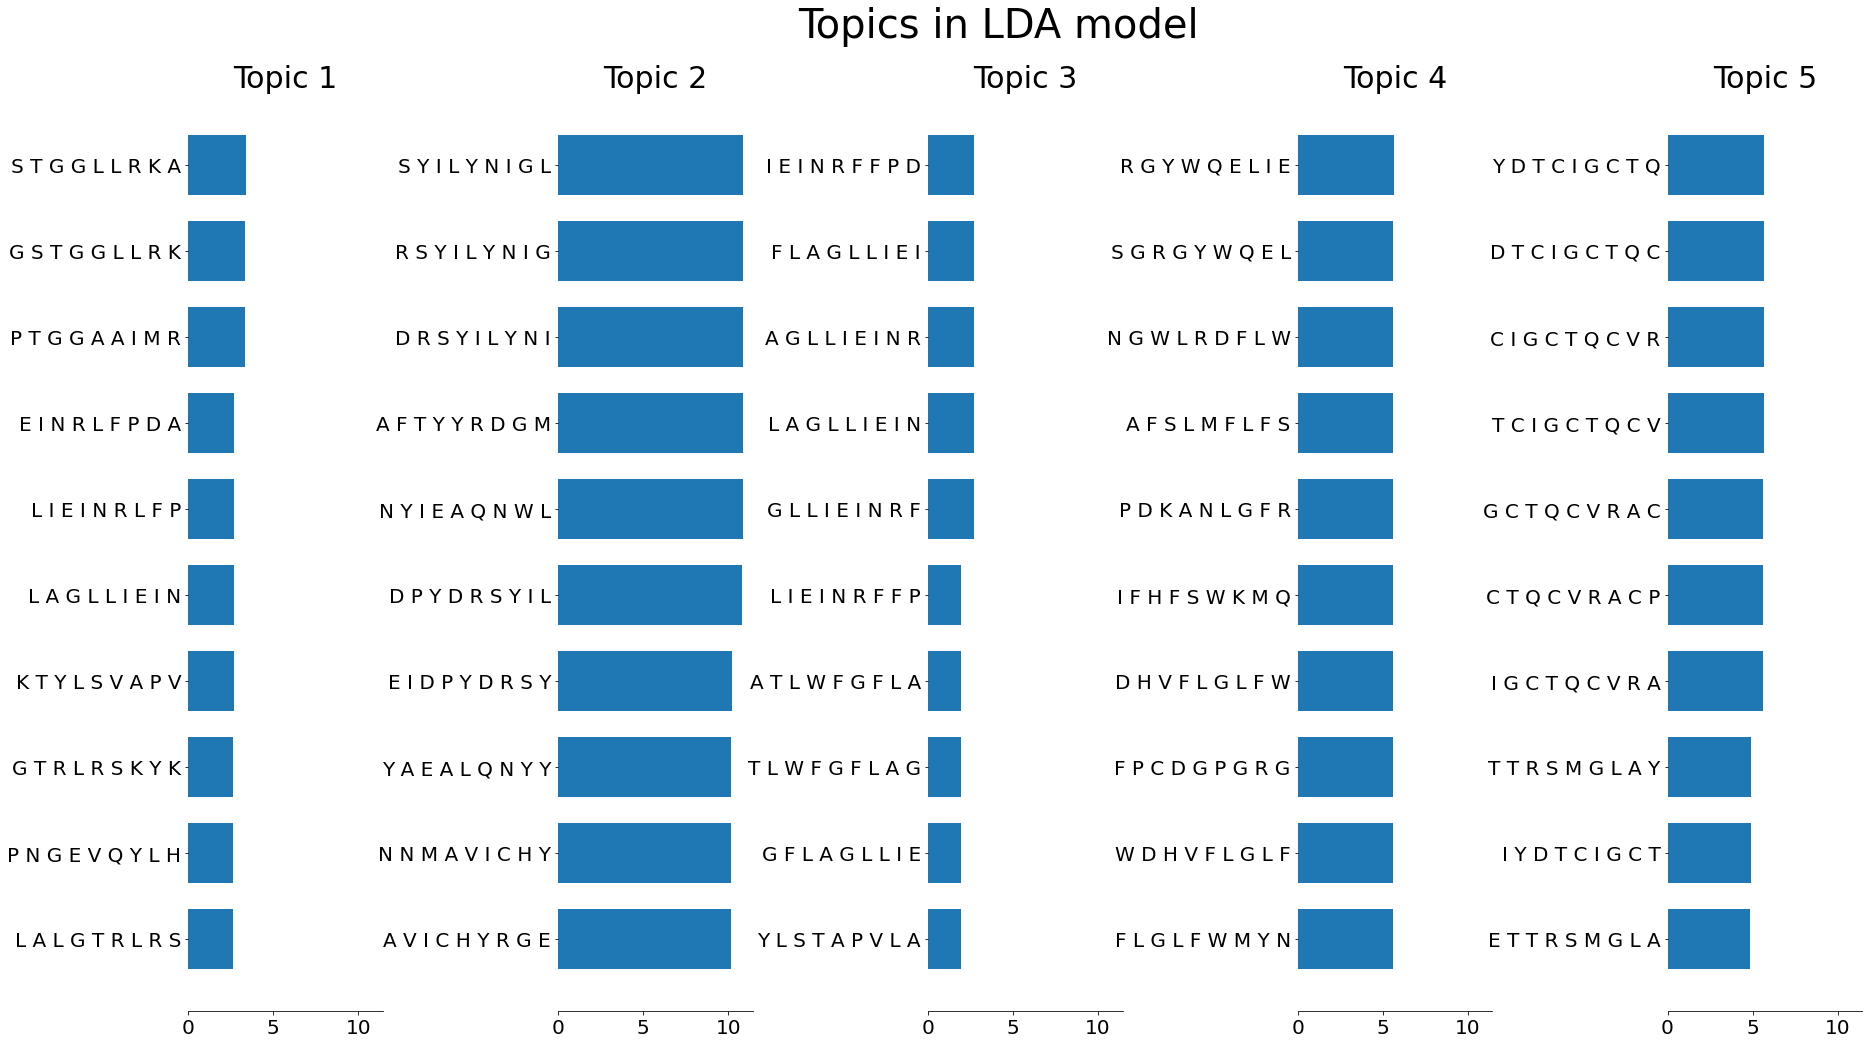




amino acid ngram range of study - (8, 8)
Extracting tf-idf features for NMF...
done in 0.065s.
Extracting tf features for LDA...
done in 0.054s.



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


done in 0.449s.


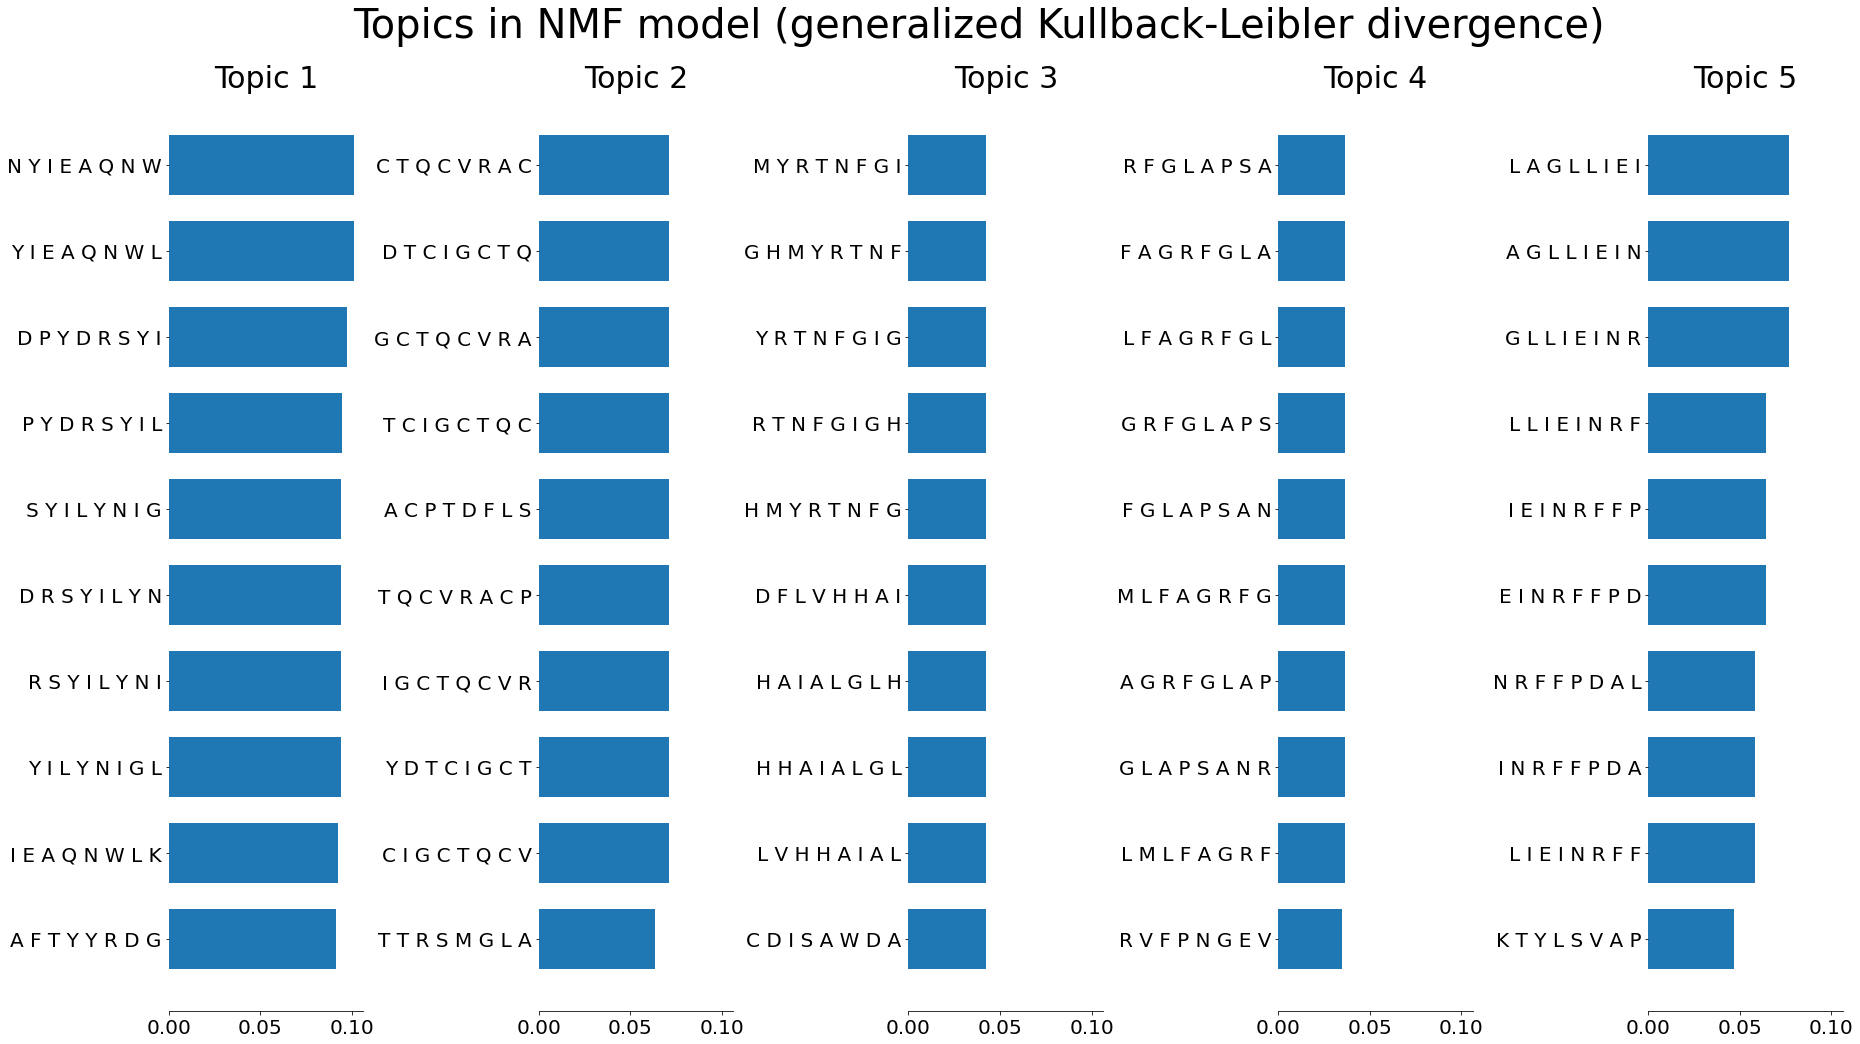



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...


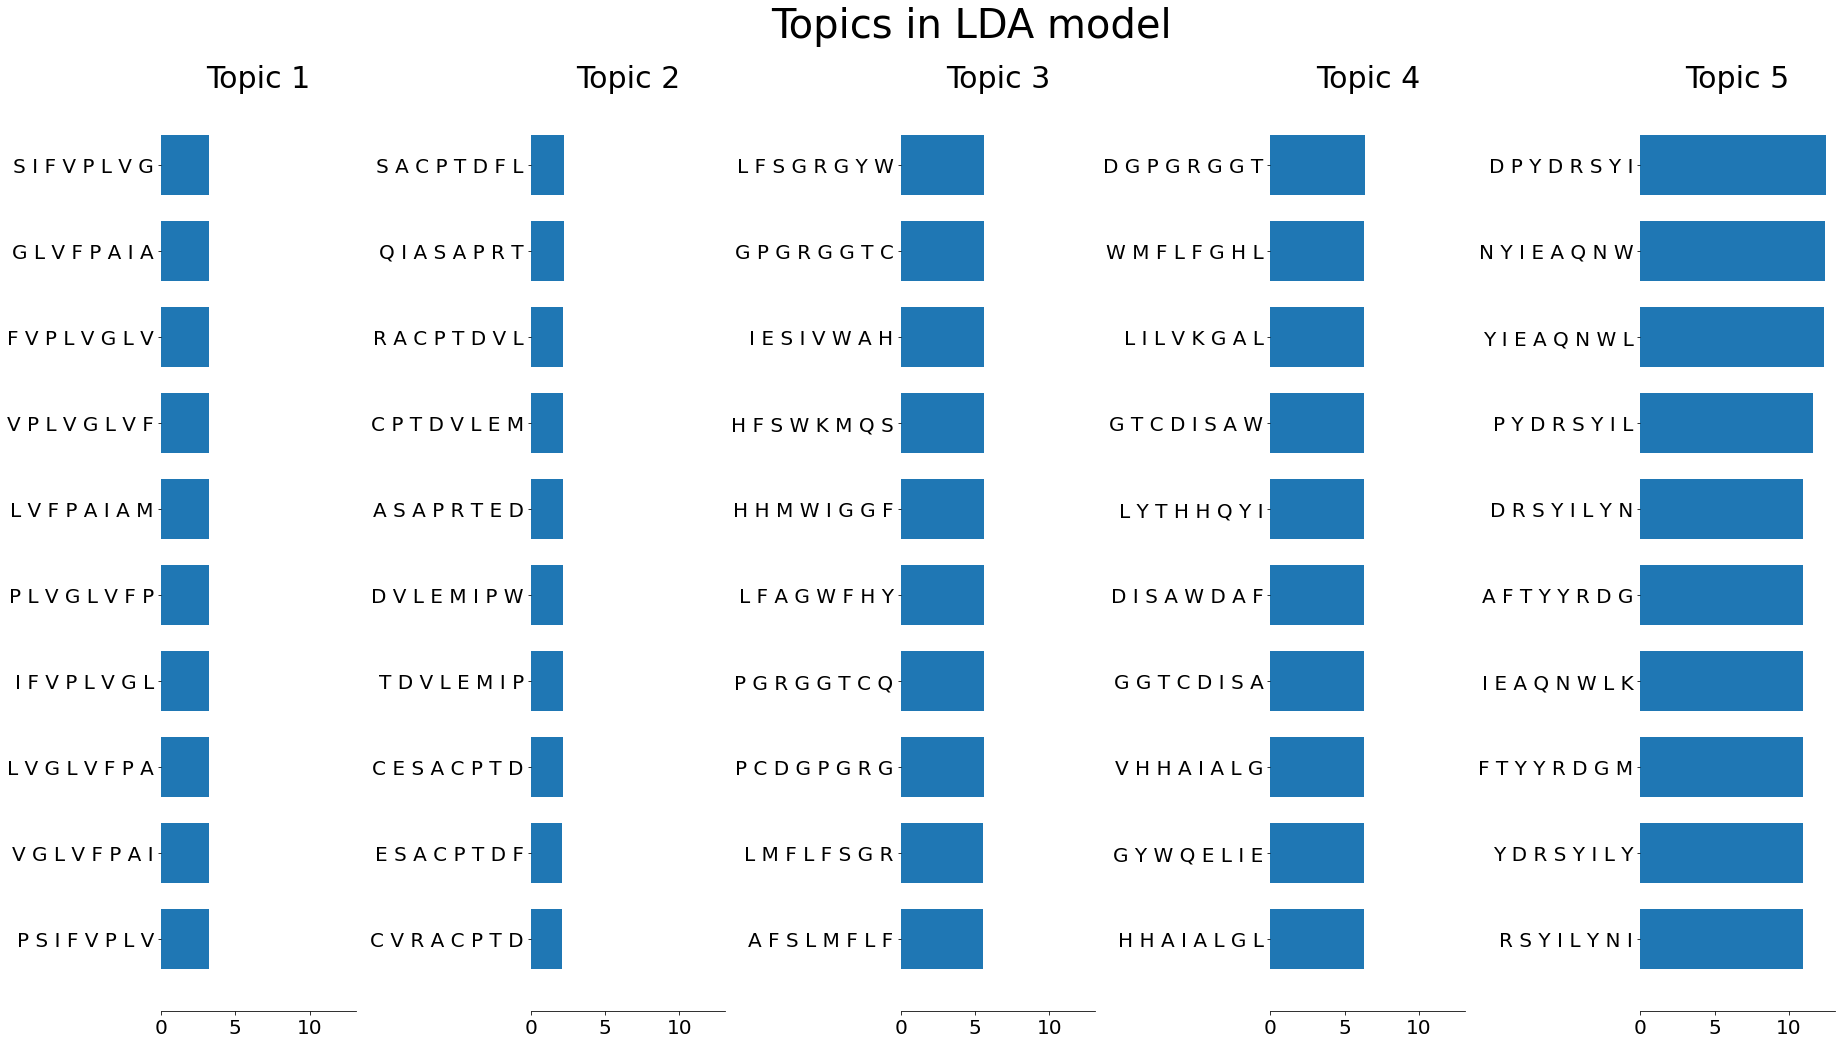




amino acid ngram range of study - (7, 7)
Extracting tf-idf features for NMF...
done in 0.289s.
Extracting tf features for LDA...
done in 0.140s.



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


done in 0.384s.


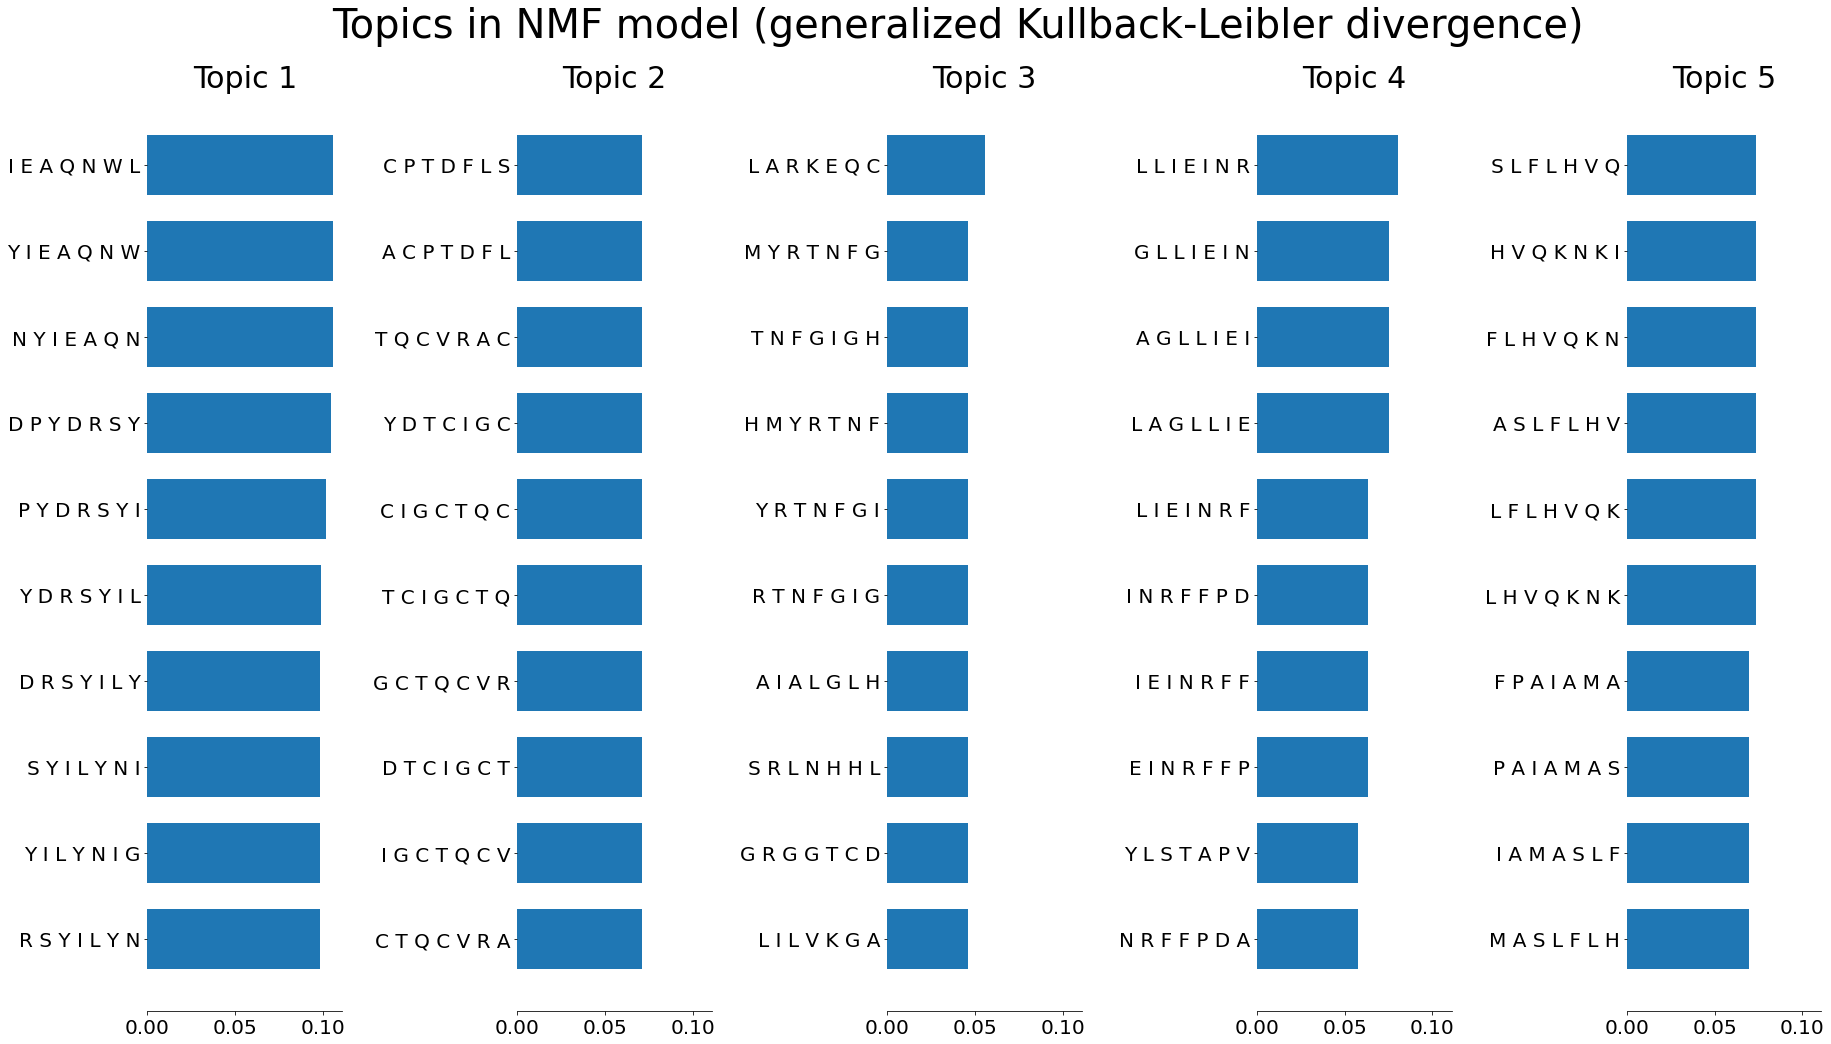



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...


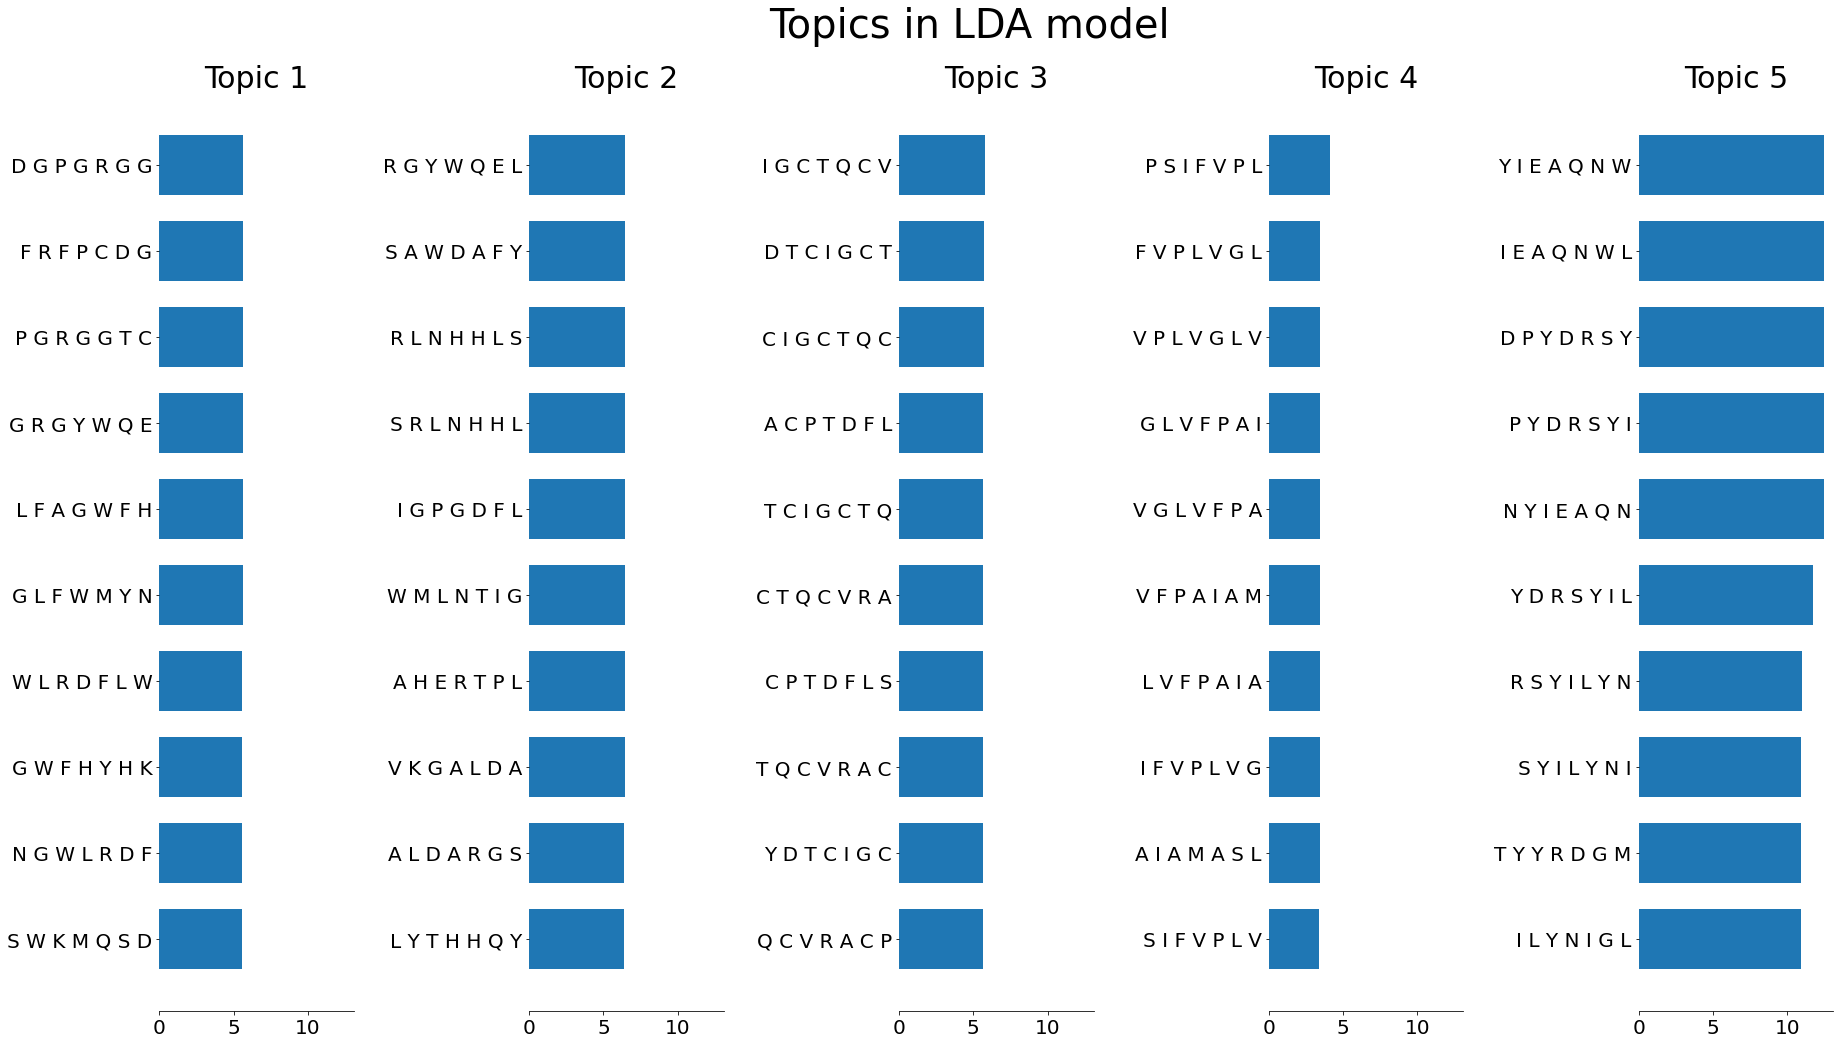




amino acid ngram range of study - (6, 6)
Extracting tf-idf features for NMF...
done in 0.090s.
Extracting tf features for LDA...
done in 0.059s.



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


done in 0.473s.


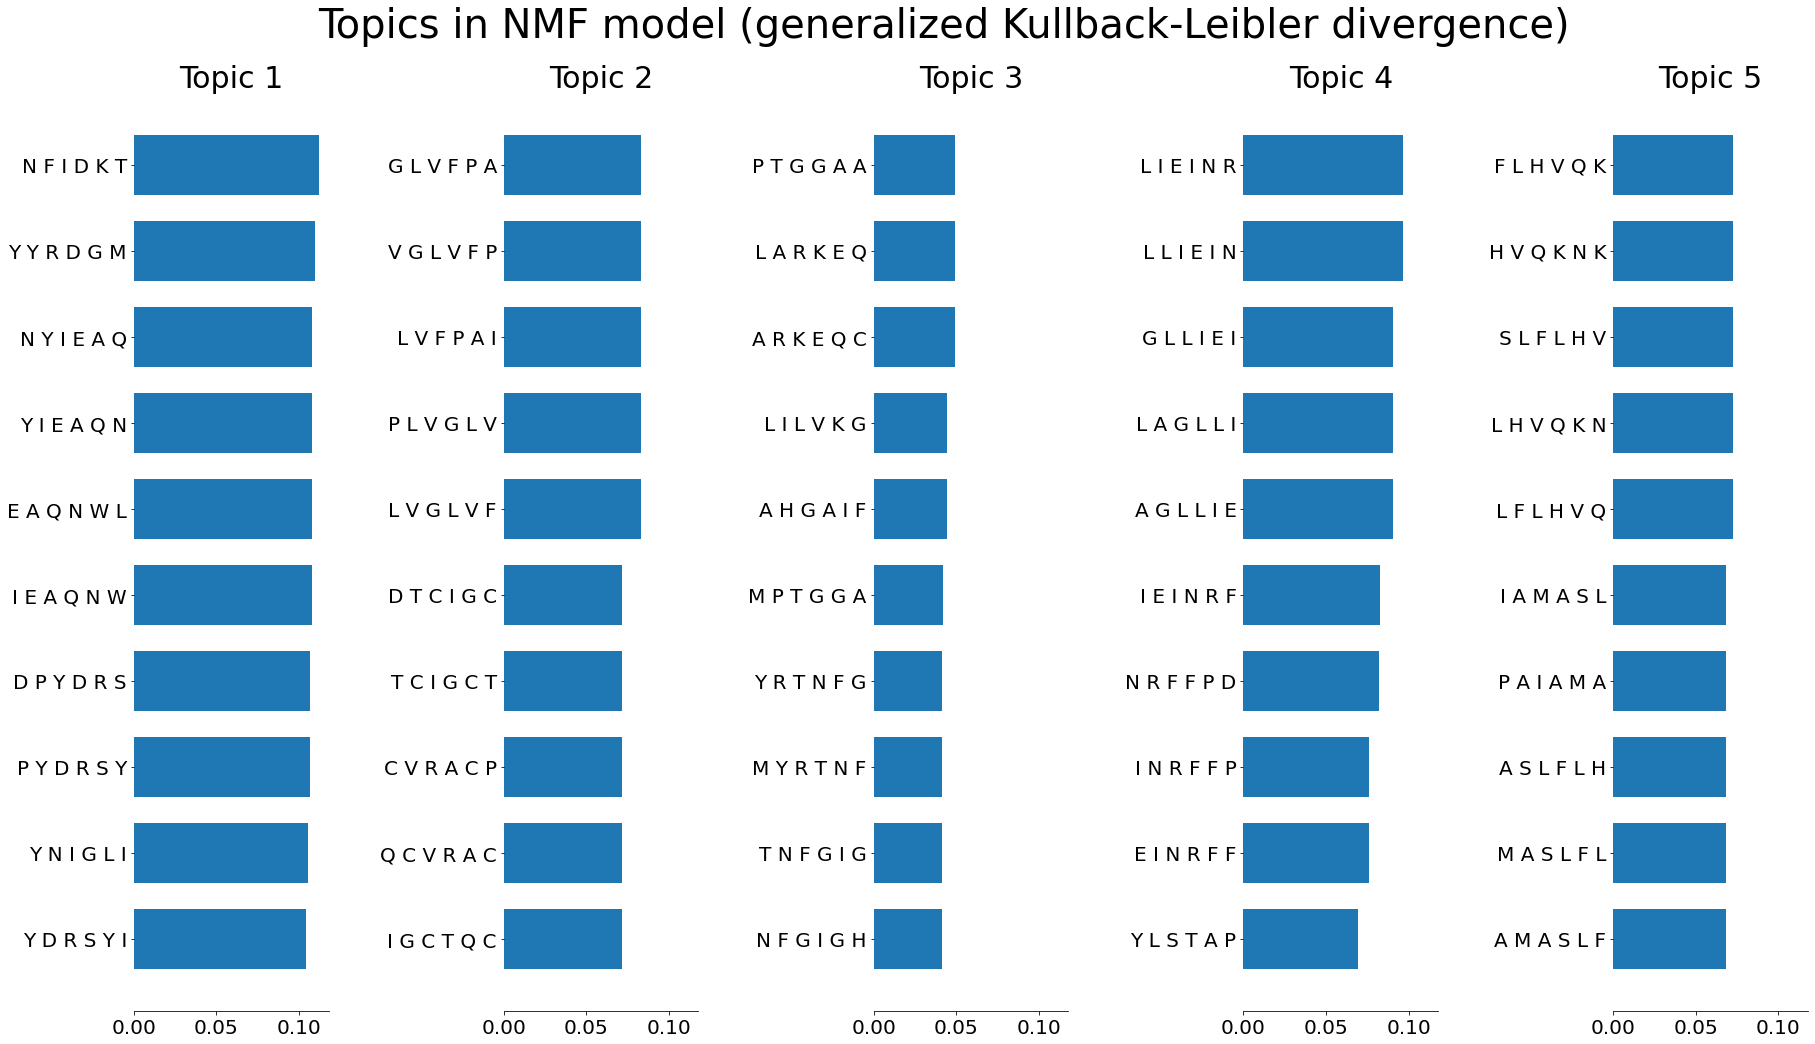



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...


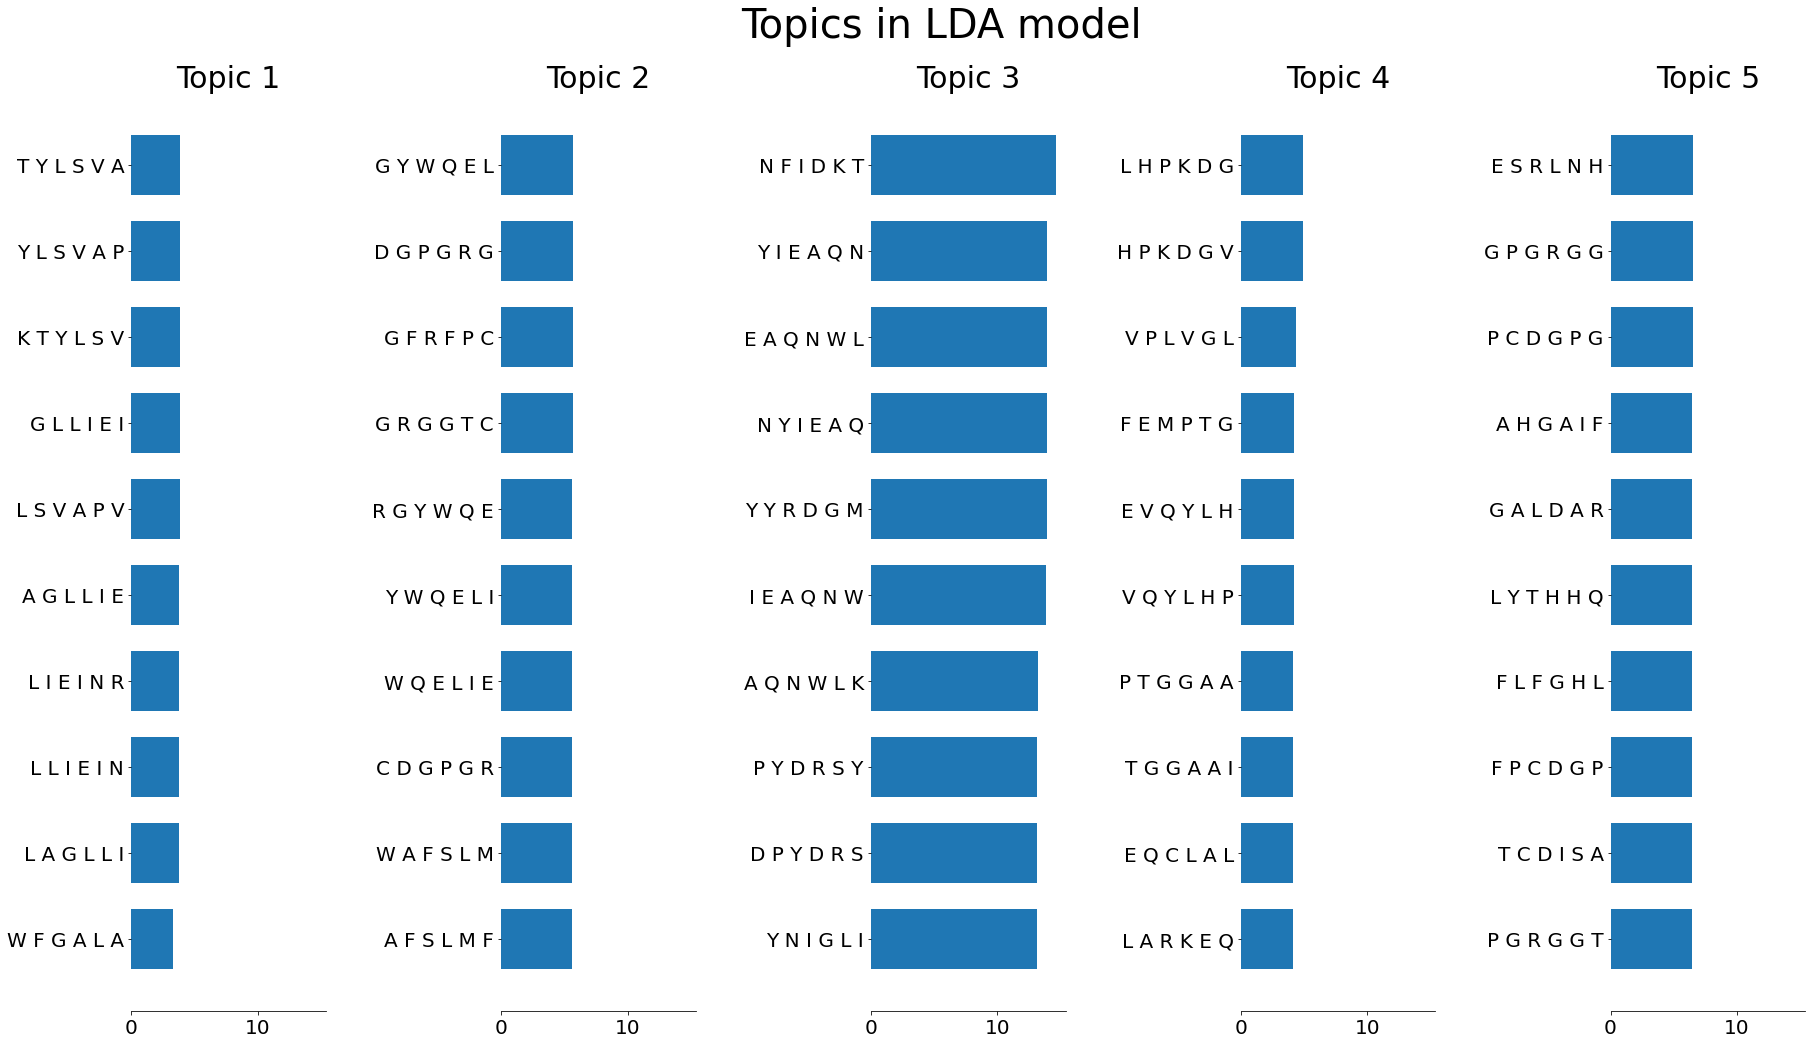




amino acid ngram range of study - (5, 5)
Extracting tf-idf features for NMF...
done in 0.213s.
Extracting tf features for LDA...
done in 0.099s.



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


done in 0.696s.


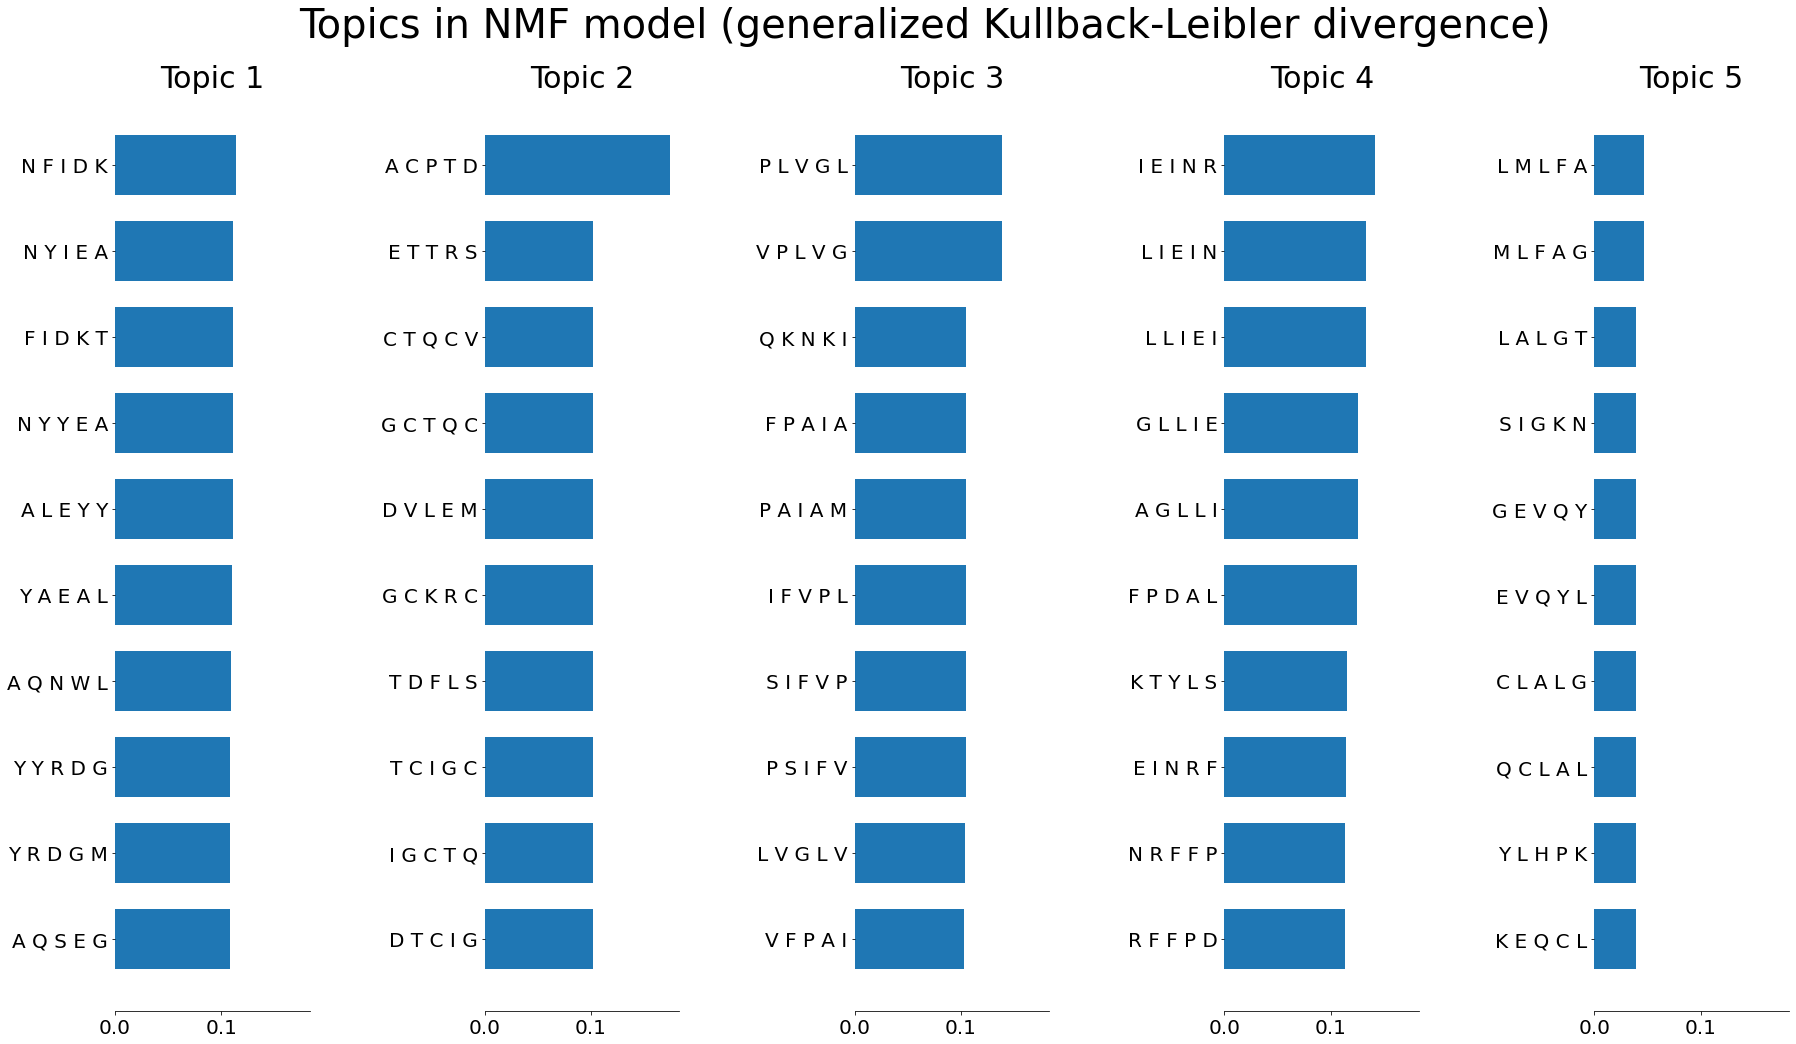



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...


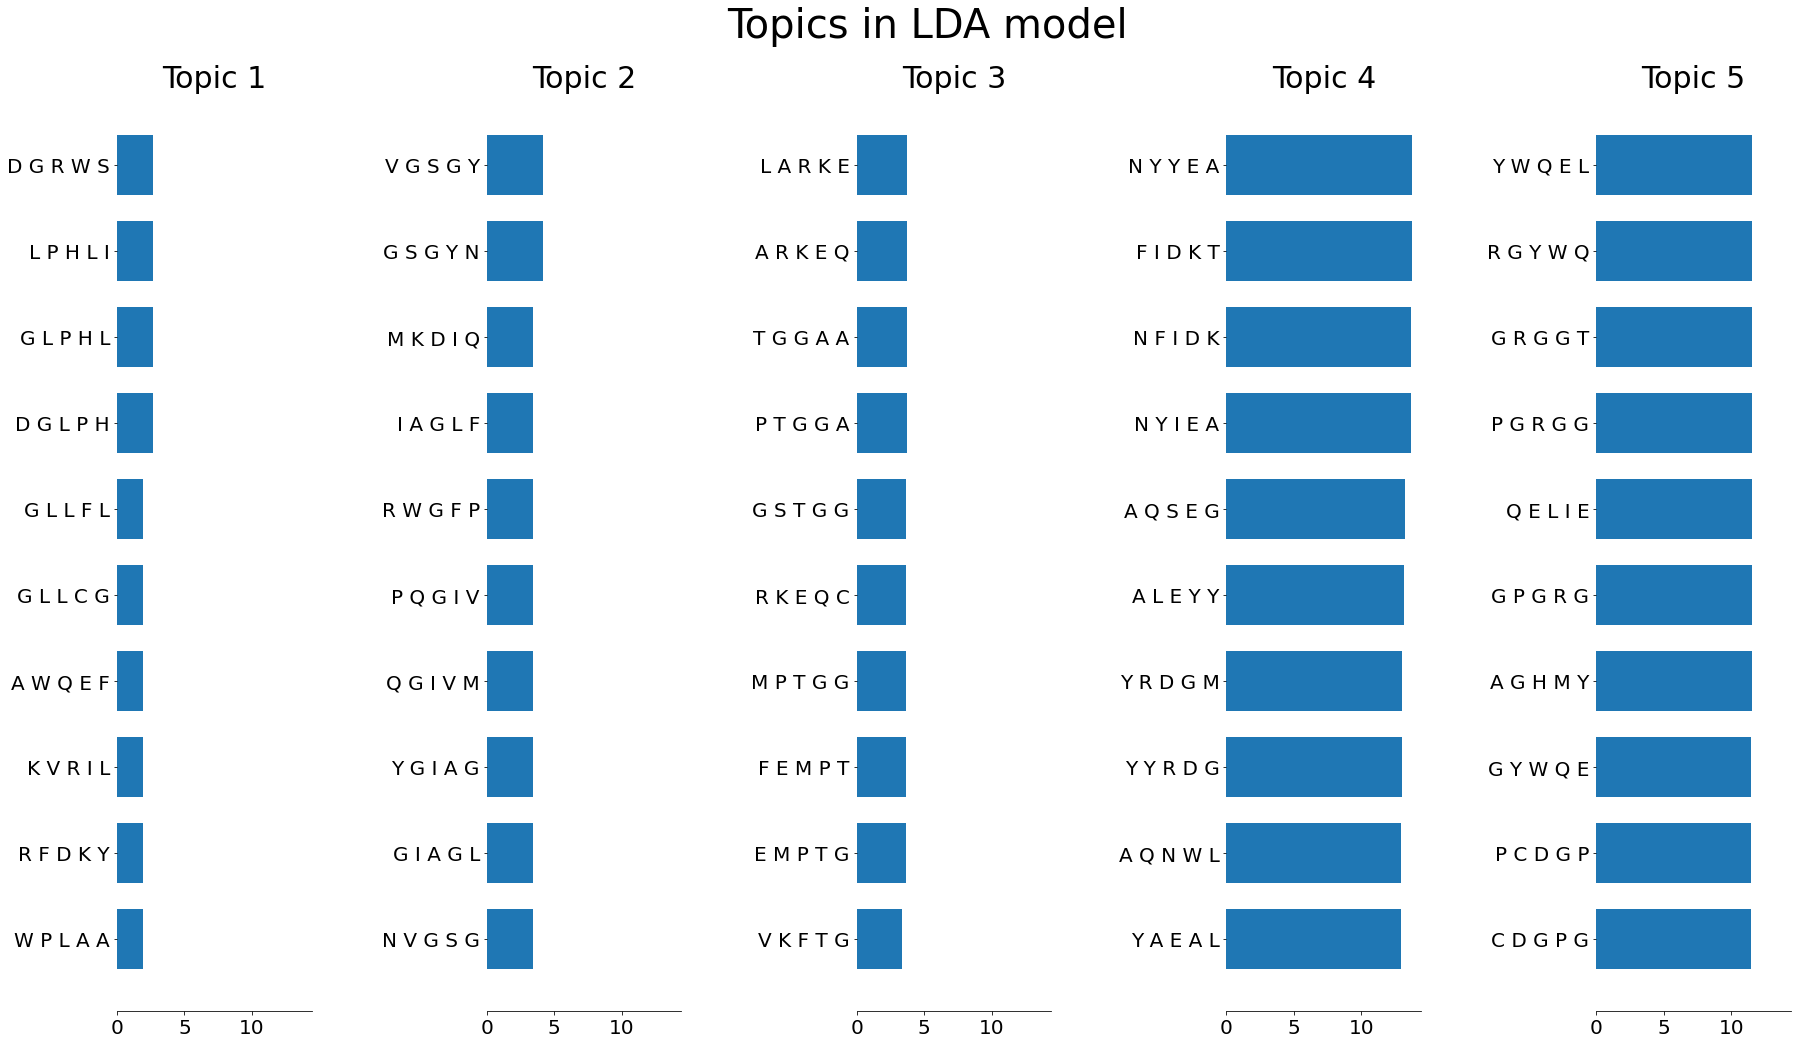




amino acid ngram range of study - (4, 4)
Extracting tf-idf features for NMF...
done in 0.148s.
Extracting tf features for LDA...
done in 0.092s.



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


done in 1.275s.


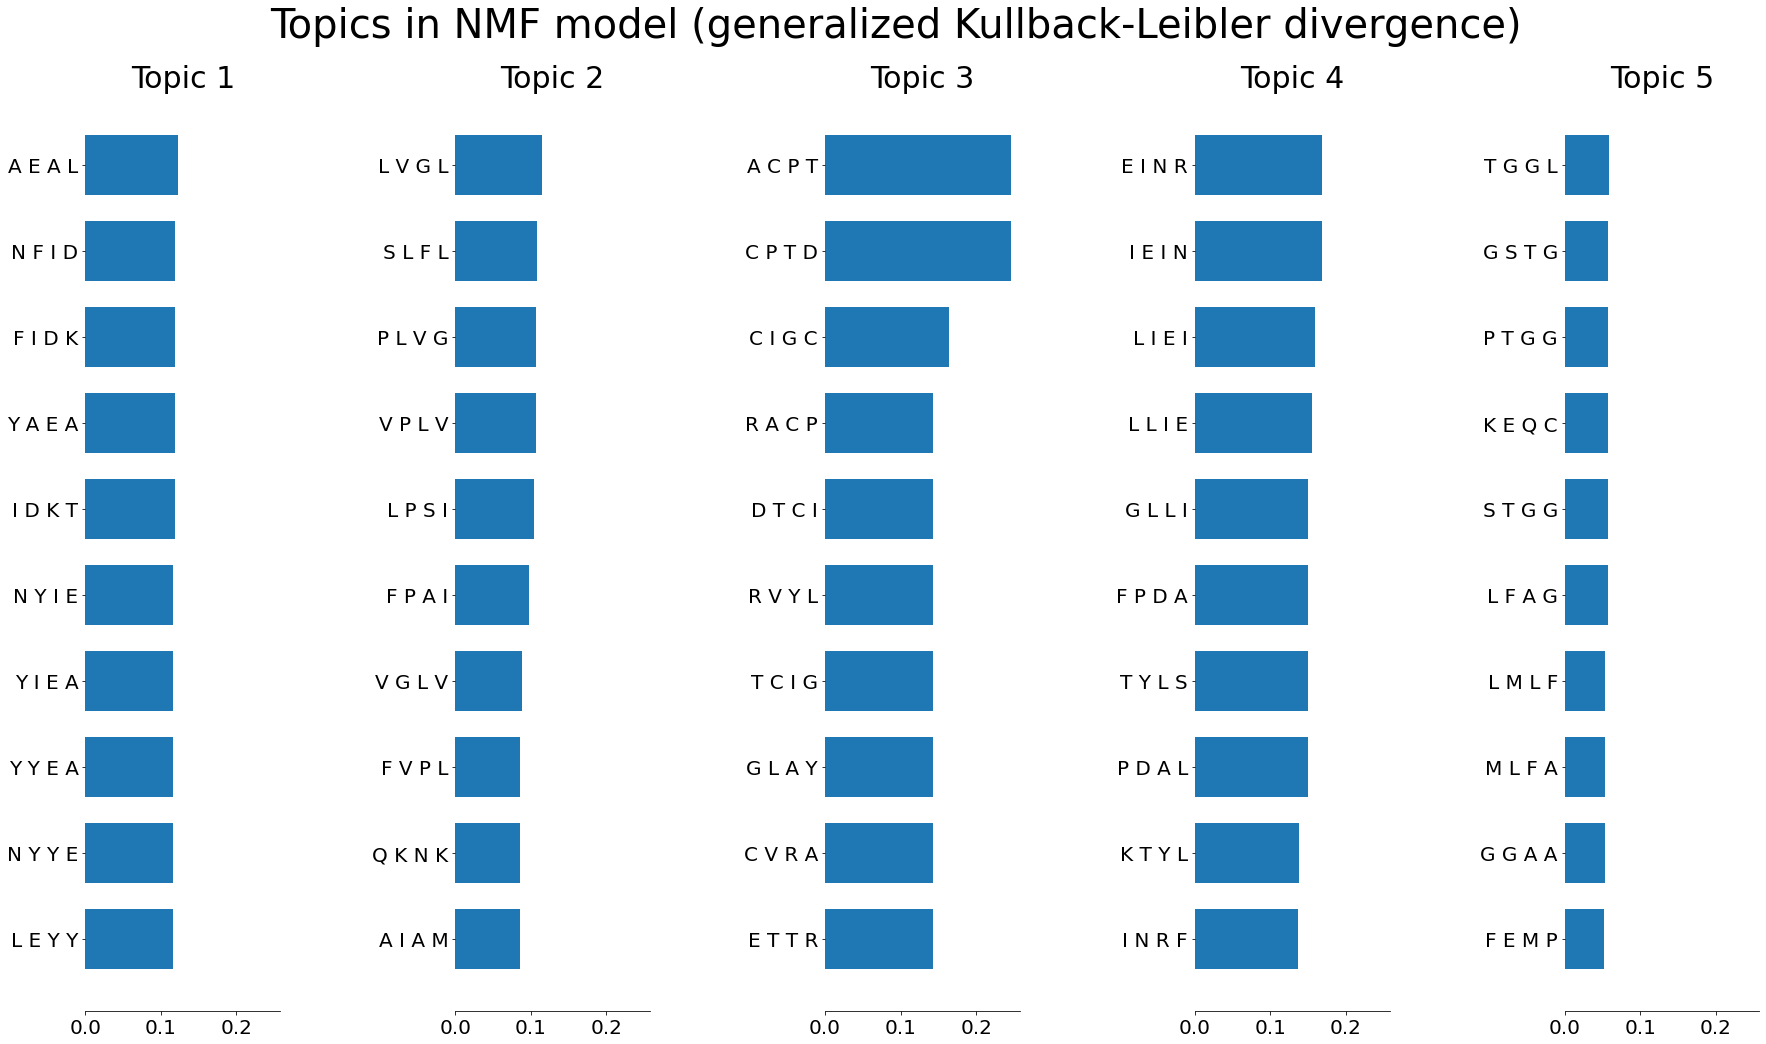



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...


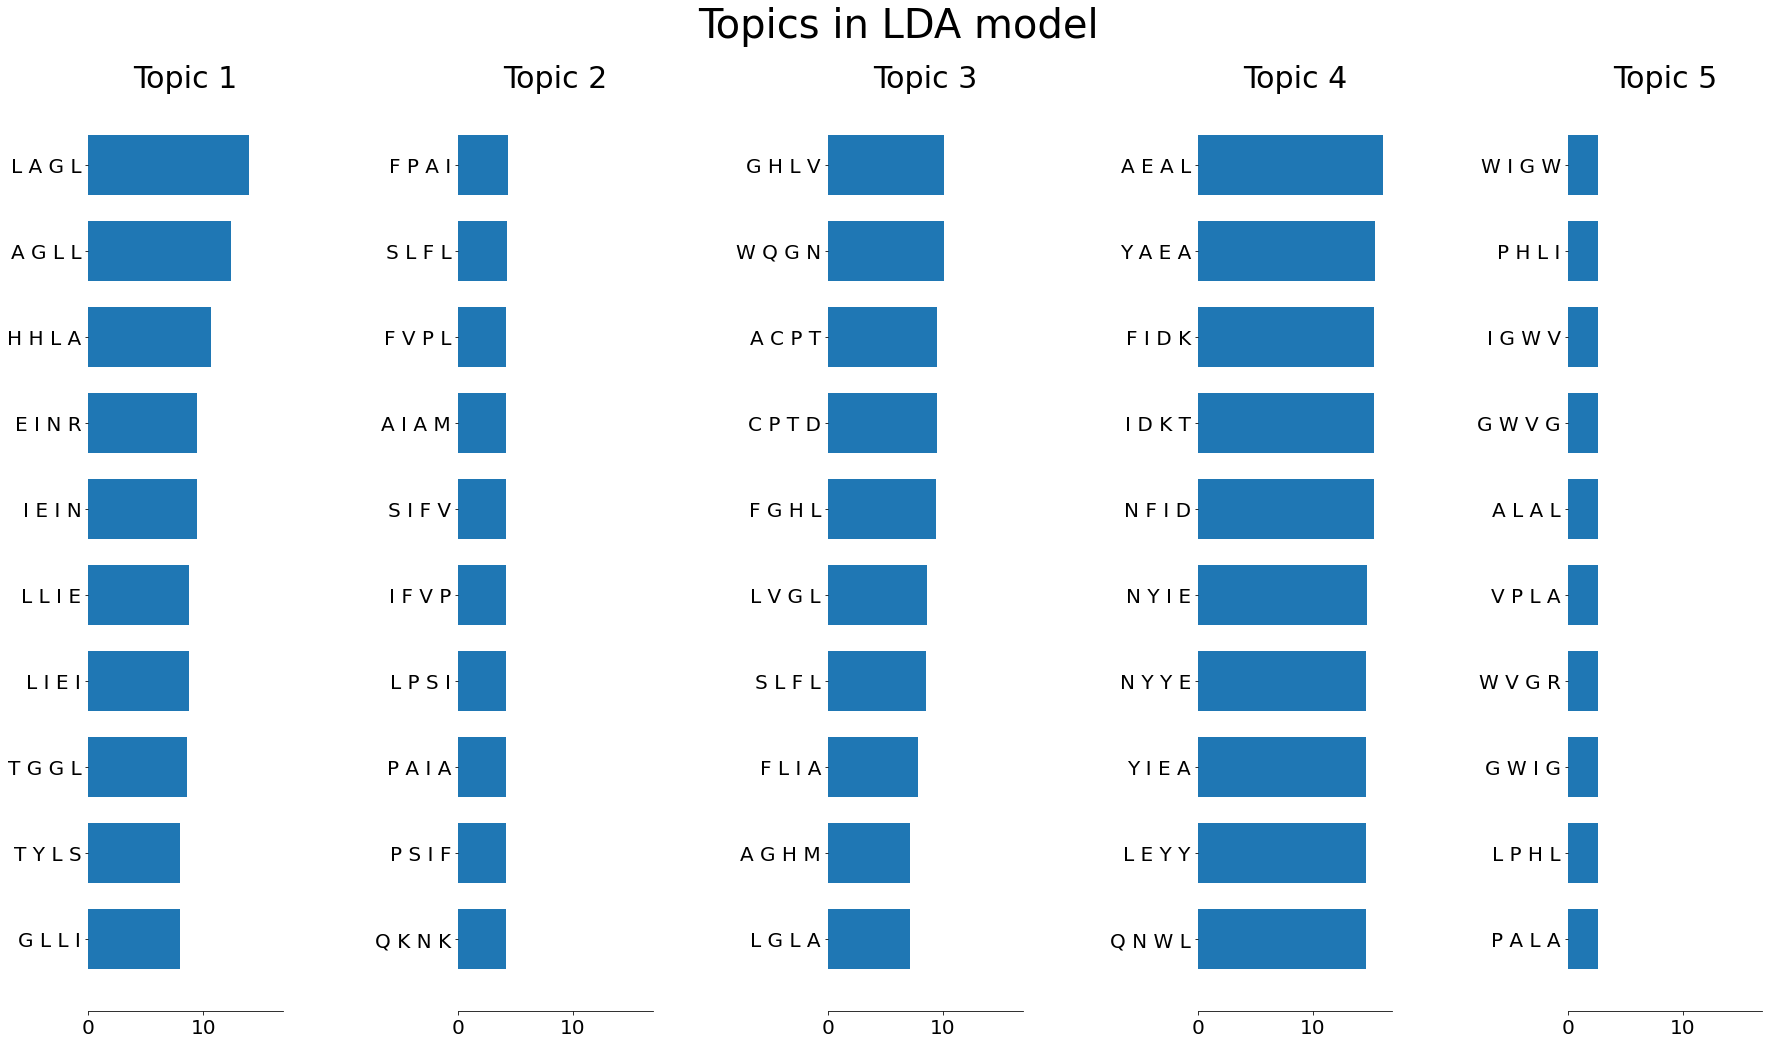




amino acid ngram range of study - (3, 3)
Extracting tf-idf features for NMF...
done in 0.065s.
Extracting tf features for LDA...
done in 0.130s.



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


done in 1.436s.


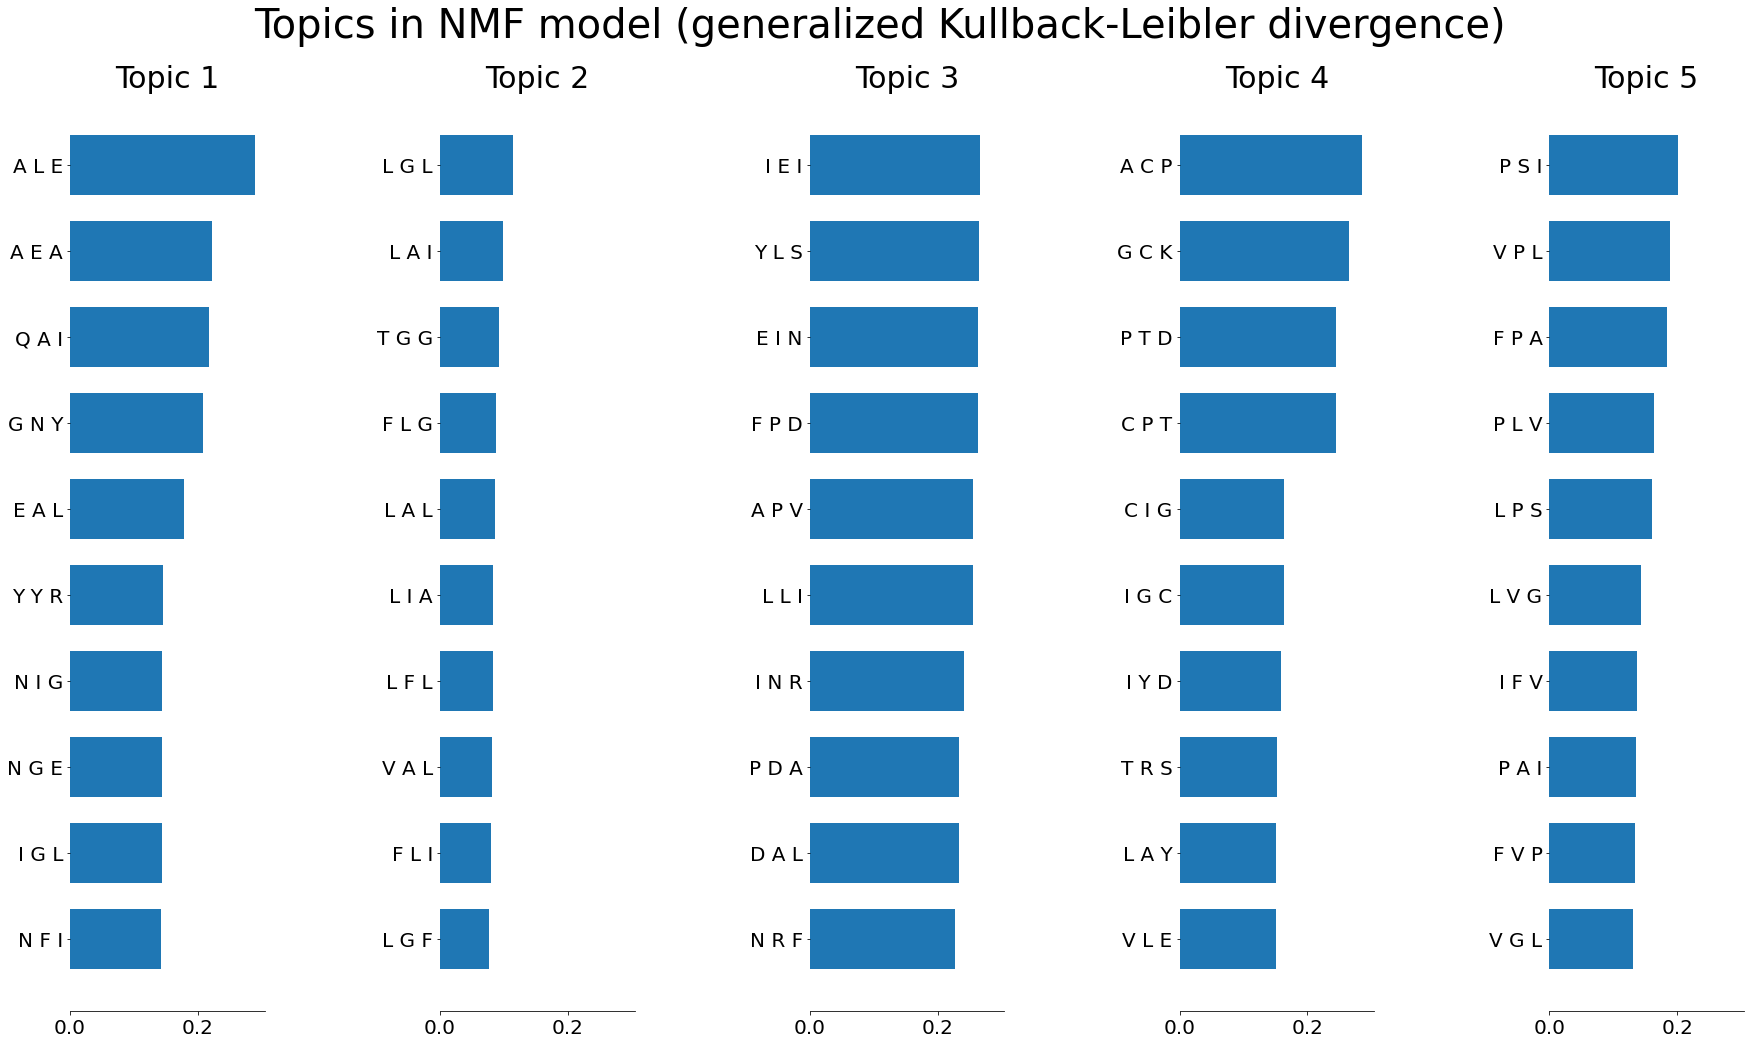



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...


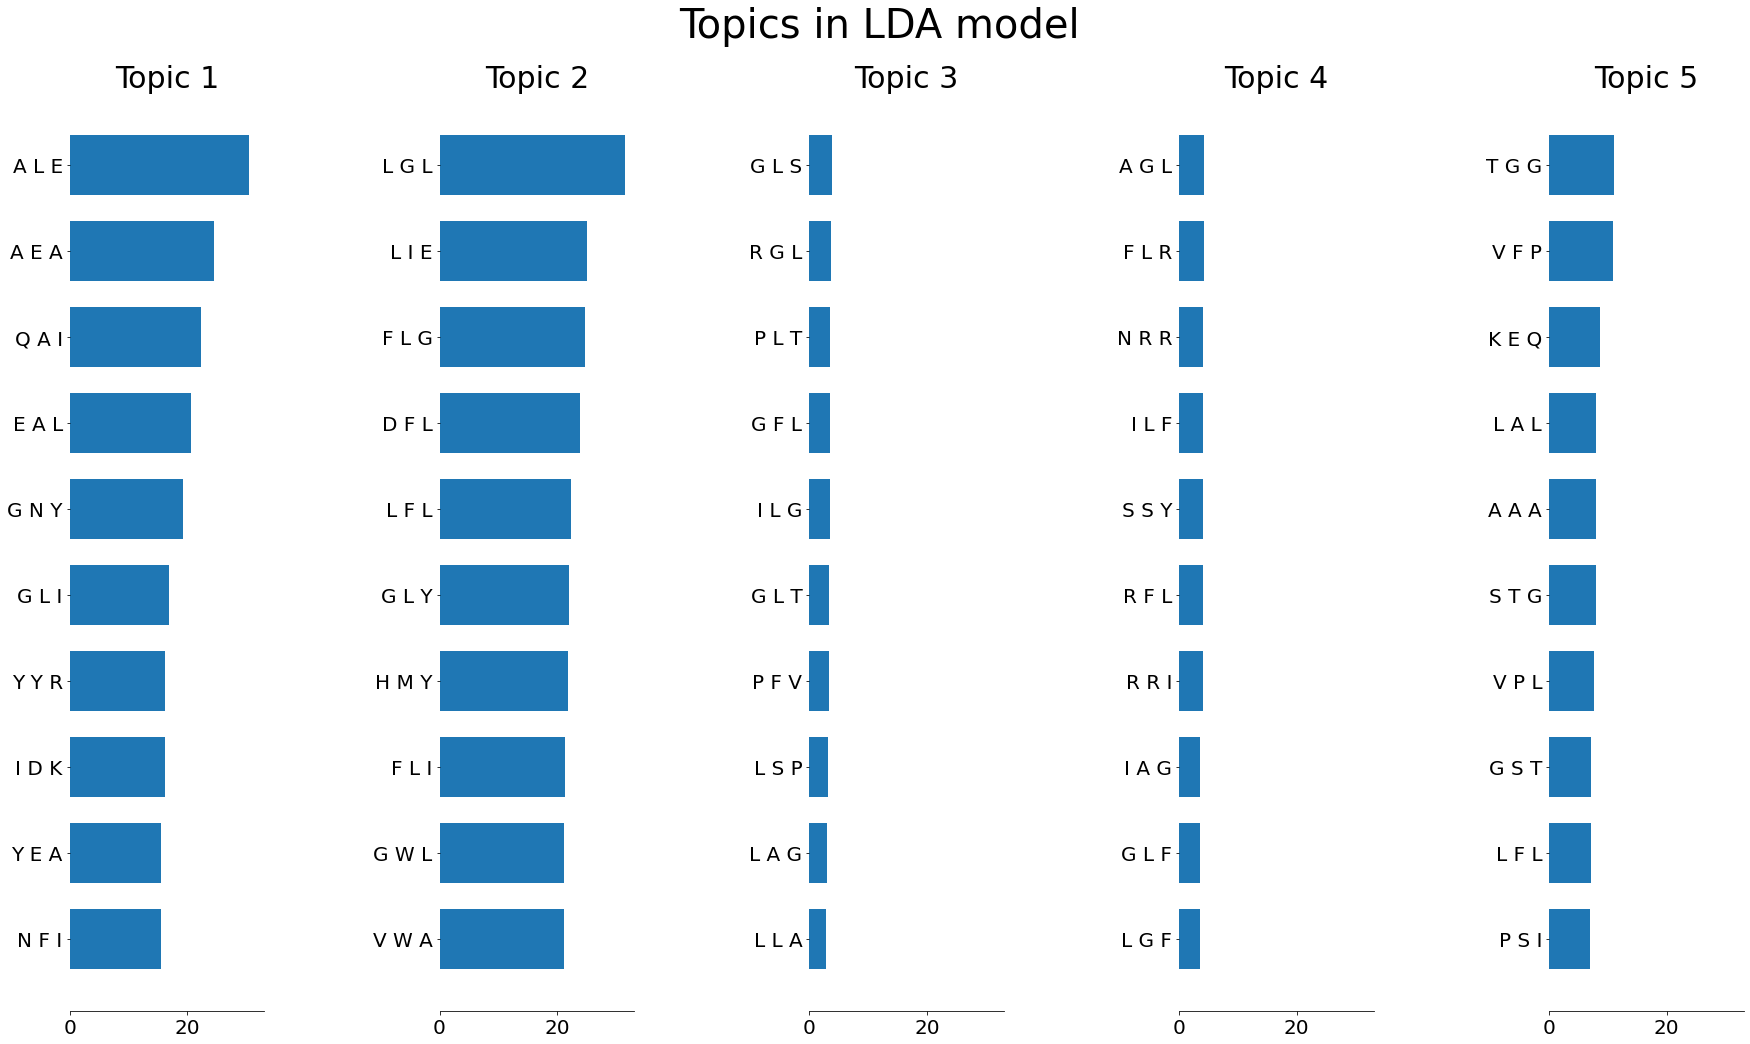




amino acid ngram range of study - (2, 2)
Extracting tf-idf features for NMF...
done in 0.063s.
Extracting tf features for LDA...
done in 0.062s.



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


done in 0.436s.


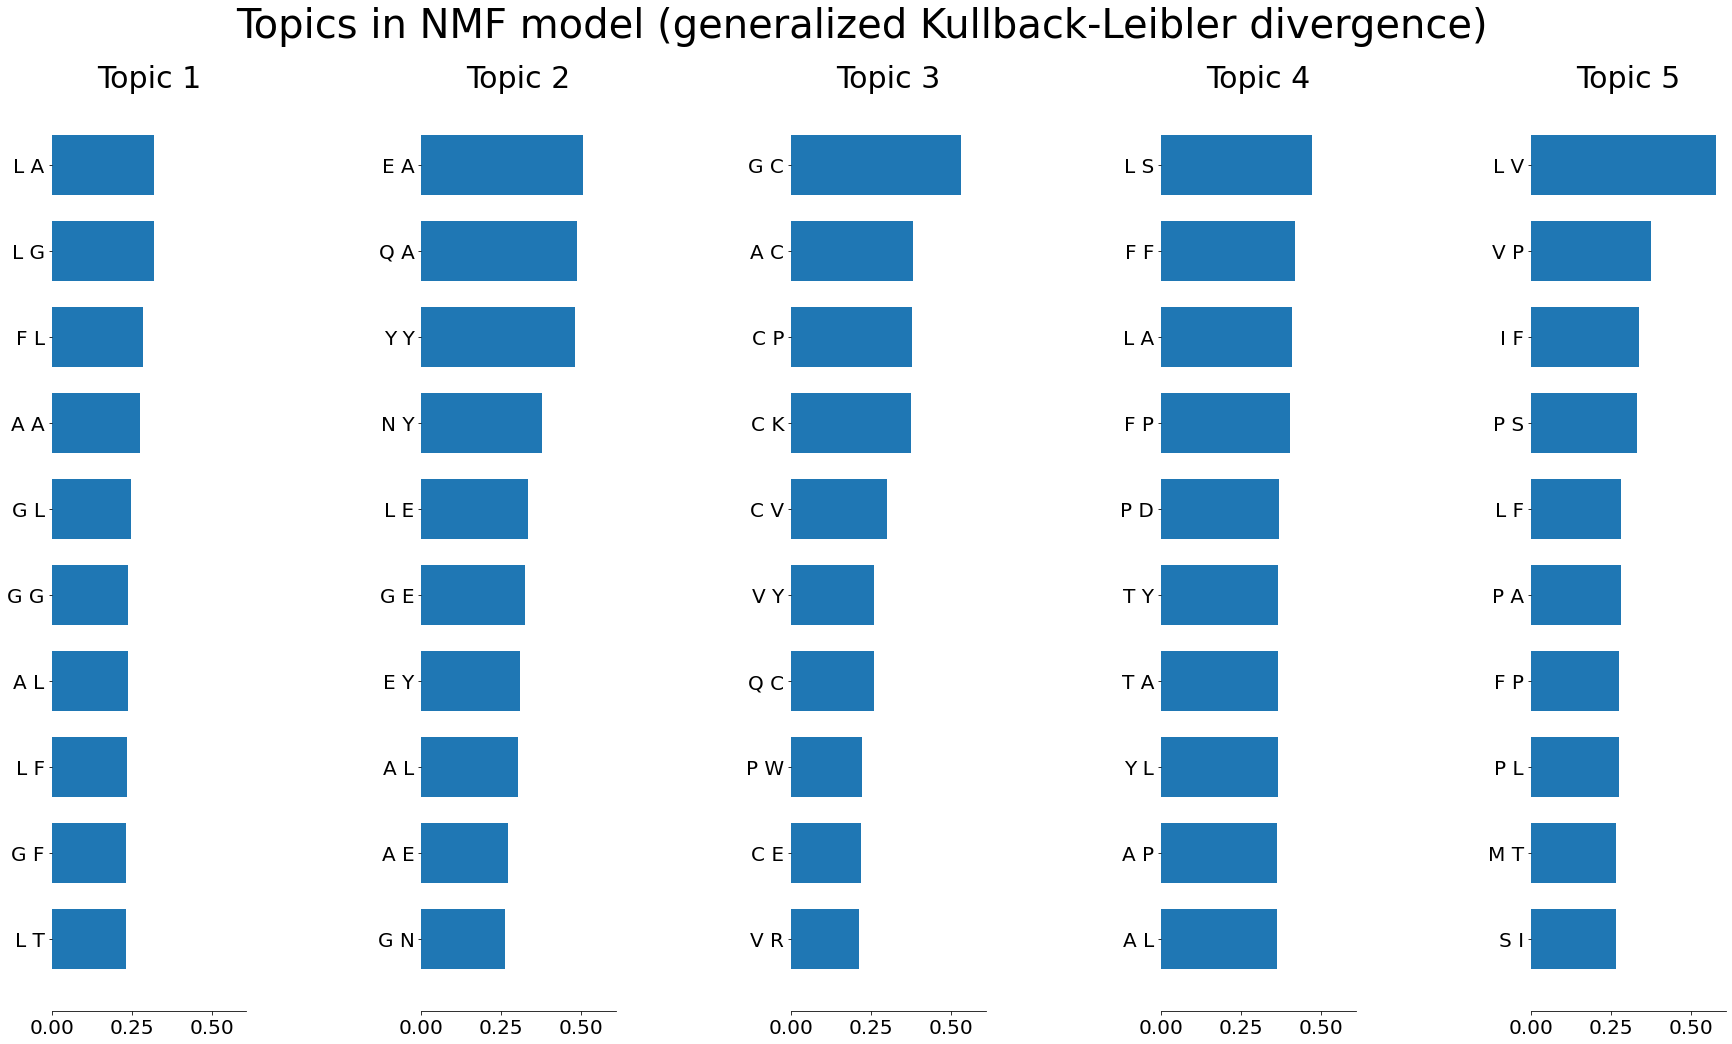



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...


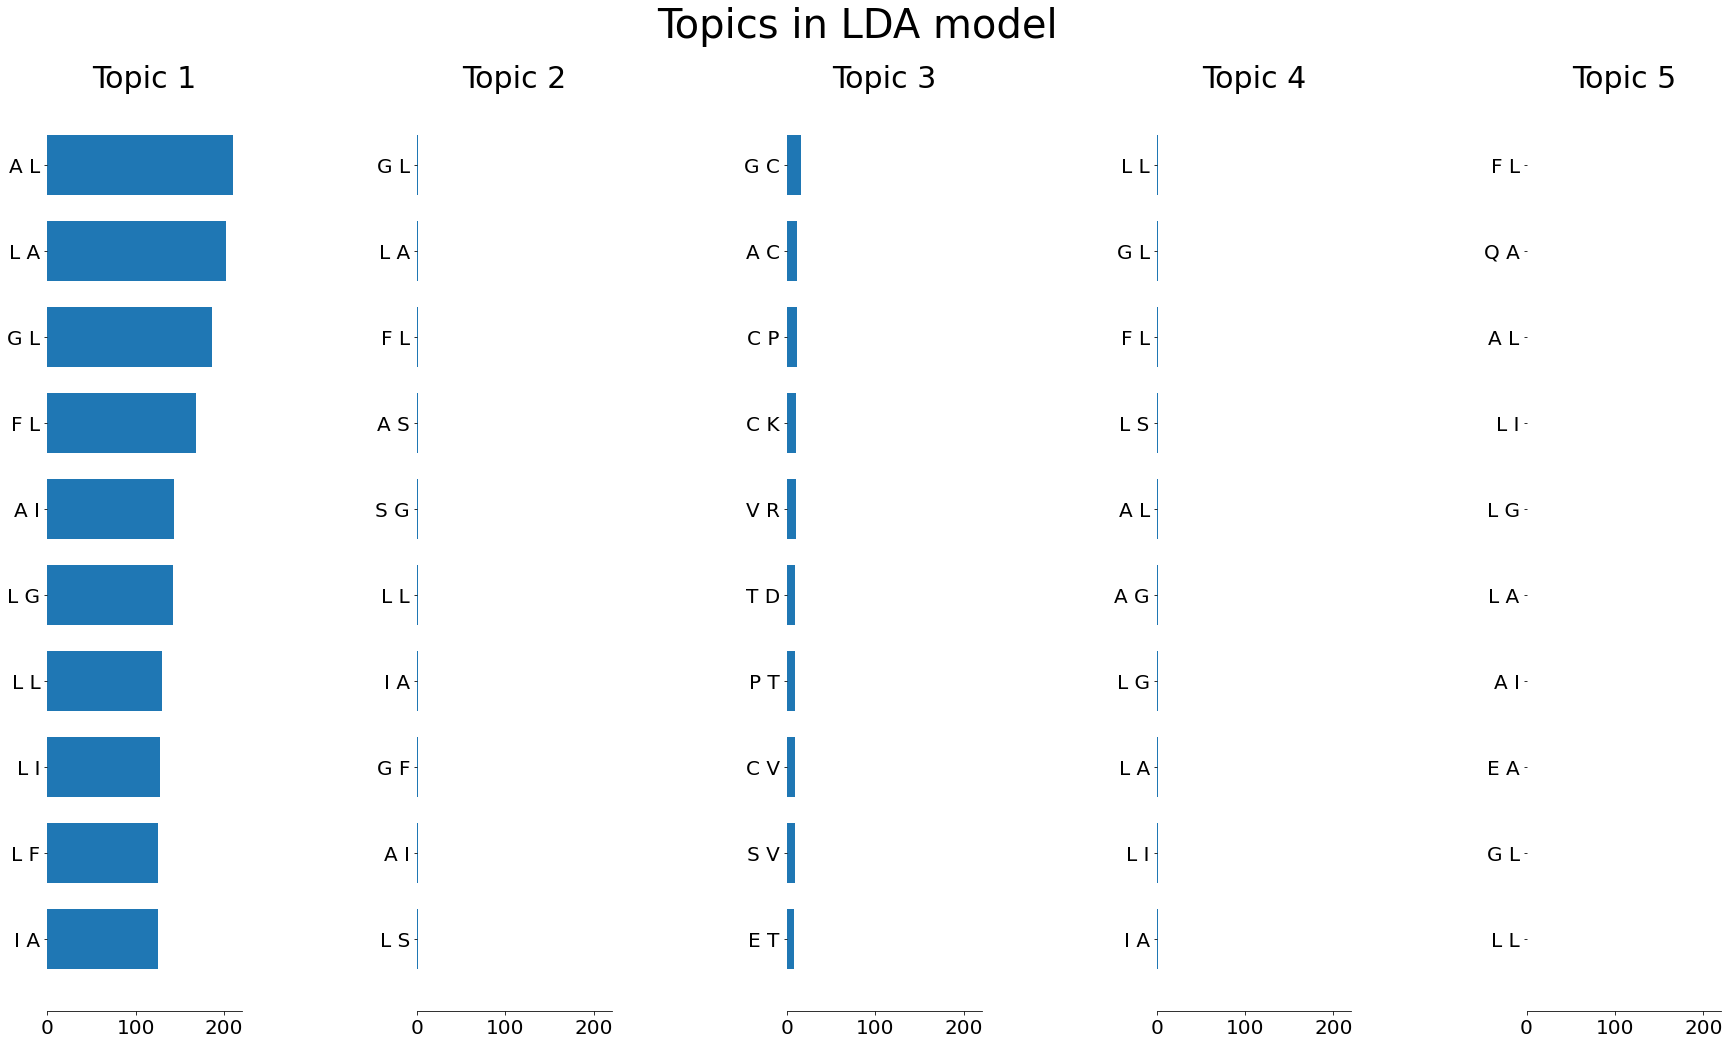




amino acid ngram range of study - (1, 1)
Extracting tf-idf features for NMF...
done in 0.025s.
Extracting tf features for LDA...
done in 0.013s.



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


done in 0.192s.


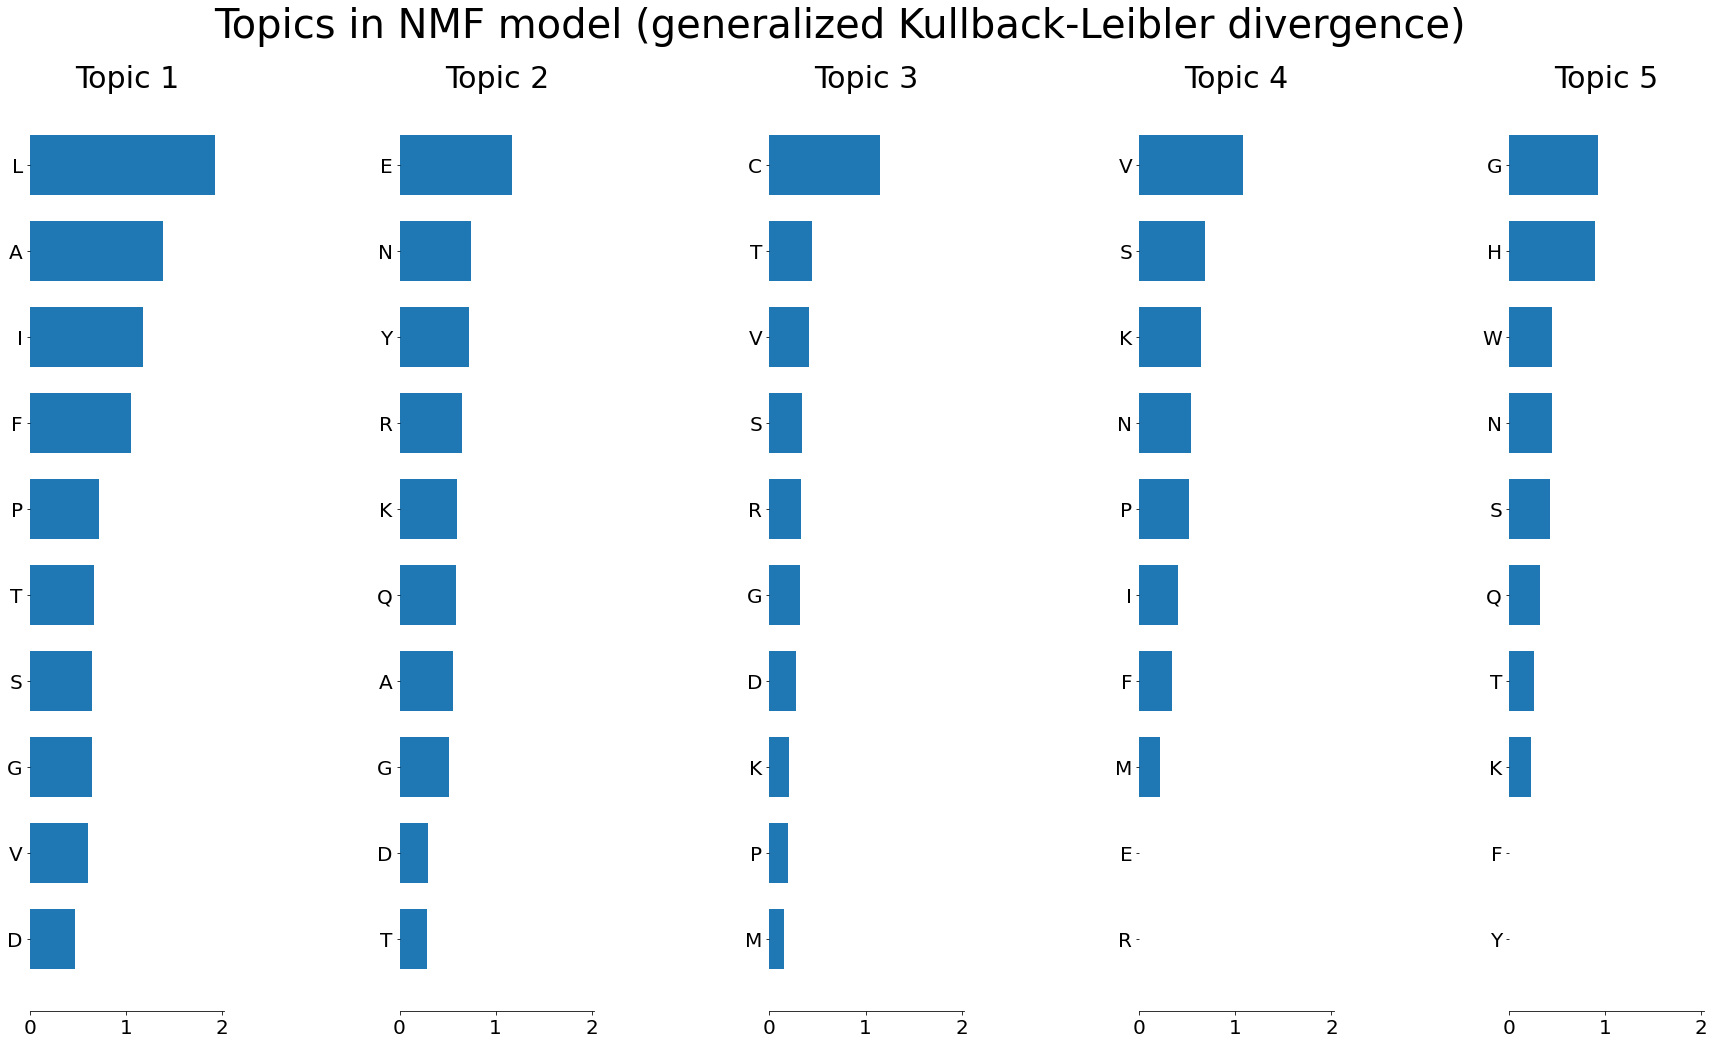



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...


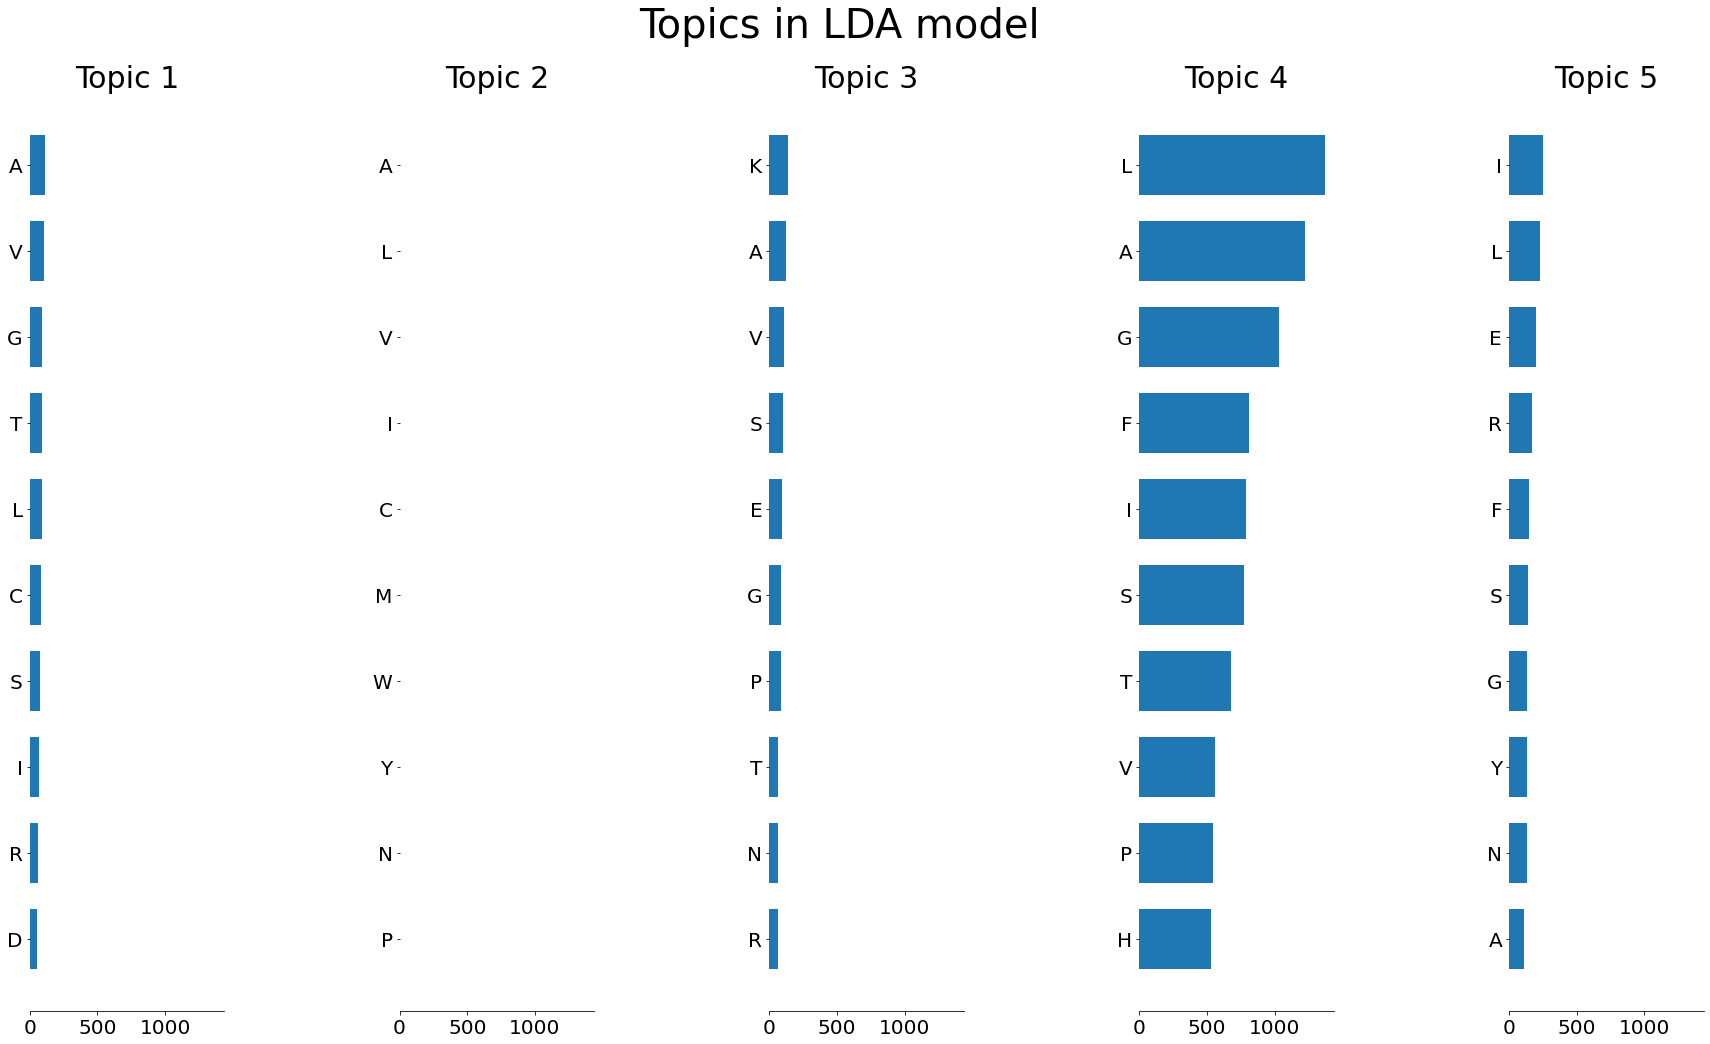

In [71]:
# produce LD
data_samples = df['protein split']
buf_df = pd.DataFrame()

for ngram_range_seed in ngram_ranges:

  # build ngram range tuple
  ngram_range = (ngram_range_seed, ngram_range_seed)
  print()
  print()
  print()
  print('amino acid ngram range of study - %s' % (ngram_range,))


# Use tf-idf features for NMF.
  print("Extracting tf-idf features for NMF...")
  tfidf_vectorizer = TfidfVectorizer(
                                  token_pattern='(?u)\\b\\w+\\b'
                                , lowercase=False
                                , ngram_range=ngram_range  
                                ,  
                                #    max_df=1
                                #  , min_df=2
                                #    max_features=n_features
                                #  , stop_words="english"
)
  t0 = time()
  tfidf = tfidf_vectorizer.fit_transform(data_samples)
  print("done in %0.3fs." % (time() - t0))

  # Use tf (raw term count) features for LDA.
  print("Extracting tf features for LDA...")
  tf_vectorizer = CountVectorizer(
                                    token_pattern='(?u)\\b\\w+\\b'
                                  , lowercase=False
                                  , ngram_range=ngram_range
                                  , 
                                  #    max_df=1
                                  #  , min_df=2
                                  #   max_features=n_features
                                  #  , stop_words="english"
  )
  t0 = time()
  tf = tf_vectorizer.fit_transform(data_samples)
  print("done in %0.3fs." % (time() - t0))
  print()


  # Fit the NMF model
  print(
      "\n" * 2,
      "Fitting the NMF model (generalized Kullback-Leibler "
      "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features),
  )
  t0 = time()
  nmf = NMF(
      n_components=n_components,
      random_state=1,
      beta_loss="kullback-leibler",
      solver="mu",
      max_iter=1000,
      alpha=0.1,
      l1_ratio=0.5,
  ).fit(tfidf)
  print("done in %0.3fs." % (time() - t0))

  tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
  dfff = plot_top_words(
      nmf,
      tfidf_feature_names,
      n_top_words,
      "Topics in NMF model (generalized Kullback-Leibler divergence)"
  )

  dfff['model'] = 'nmf'
  dfff['ngram_seed'] = ngram_range_seed
  buf_df = pd.concat([buf_df, dfff])

  print(
      "\n" * 2,
      "Fitting LDA models with tf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features),
  )
  lda = LatentDirichletAllocation(
      n_components=n_components,
      max_iter=25,
      learning_method="online",
      learning_offset=50.0,
      random_state=0,
  )

  lda.fit(tf)

  tf_feature_names = tf_vectorizer.get_feature_names_out()
  dff = plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")

  dff['model'] = 'lda'
  dff['ngram_seed'] = ngram_range_seed
  buf_df = pd.concat([buf_df, dff])

In [72]:
# build relationship model variations, as to represent downstream graph network layers
# ex. one graph maybe be based on sequence's of varying lengths and their relationship strenths to unsupervised LDA topics
#     another maybe be simply sequence's of varying lengths and their inclusion within larger sequences, ect.

# prime structure with input sequences
higher_order_sequence = df['protein split']
species_sequence = df['species']

buff_df = pd.DataFrame()
graph_lst = []
graph_node_lst = []
graph_specific_node_lst = []
graph_species_generic_node_lst = []

# for each latent representative
for md in ['lda', 'nmf']:

  # for each range of amino acid / peptide n-grams
  for ngram_range_seed in ngram_ranges:

    # reset buffer at each ngram
    buf_lst = []

    # for each combination of sequence length and model
    df_slice = buf_df[buf_df['ngram_seed'] == ngram_range_seed]
    df_slice = df_slice[df_slice['model'] == md]

    # for each cluster of peptide / acids
    rw = 0
    for cluster in range(1, n_components):

      peptide_node = f"Topic_{cluster}_node"
      peptide_specific_node = f"{ngram_range_seed}_Seq_Topic_{cluster}_node"
      peptide_weight = f"Topic_{cluster}_weight"

      # for each combination of cluster and ngram peptide
      for scenerio in range(0, len(peptide_node)):
      
        # envoke pods
        try:

          # dont return to much info
          if len(df_slice[peptide_node][scenerio]) > 2:

            # PROCESS INSIGHT - UNCOMMENT IF NEEDED FOR EXPANDING RELATIONSHIPS
            #print('%s Model - Topic - %d Node - %s Weight %s' % ( md
            #                                                    , cluster
            #                                                    , df_slice[peptide_node][scenerio]
            #                                                    , df_slice[peptide_weight][scenerio]))
            
            # populate buffer list
            buf_lst.append(df_slice[peptide_node][scenerio])

        # empty pods
        except:
          pass


        # for each higher order sequence
        for protein in higher_order_sequence:

              # attempt to locate sub components
              try:

                # dont return to much info
                if len(df_slice[peptide_node][scenerio]) > 2:

                  # if sequence is in above sequence
                  if df_slice[peptide_node][scenerio] in protein:
                    
                    # PROCESS INSIGHT - UNCOMMENT IF NEEDED FOR EXPANDING RELATIONSHIPS
                    # print(f'    {(protein[:20] + "..") if len(protein) > 20 else protein}')
                    # print(higher_order_sequence.index(protein))
                    # print(species_sequence[higher_order_sequence.index(protein)])

                    # populate graph source
                    graph_lst.append([(protein[:20] + "..") if len(protein) > 20 else protein
                                    ,df_slice[peptide_node][scenerio]
                                    ,df_slice[peptide_weight][scenerio]])
                    
                    # populate topic graph
                    graph_node_lst.append([peptide_node
                                         ,df_slice[peptide_node][scenerio]
                                         ,df_slice[peptide_weight][scenerio]])

                    # populate ngram specific nodes
                    graph_specific_node_lst.append([peptide_specific_node
                                         ,df_slice[peptide_node][scenerio]
                                         ,df_slice[peptide_weight][scenerio]])
                    
                    # populate species generic level specific nodes
                    graph_species_generic_node_lst.append([species_sequence[higher_order_sequence.index(protein)]
                                         ,df_slice[peptide_node][scenerio]
                                         ,df_slice[peptide_weight][scenerio]])                    
                    


              except:
                pass

        # increment count
        rw += 1

    # populate rolling hierarchy
    higher_order_sequence = buf_lst        

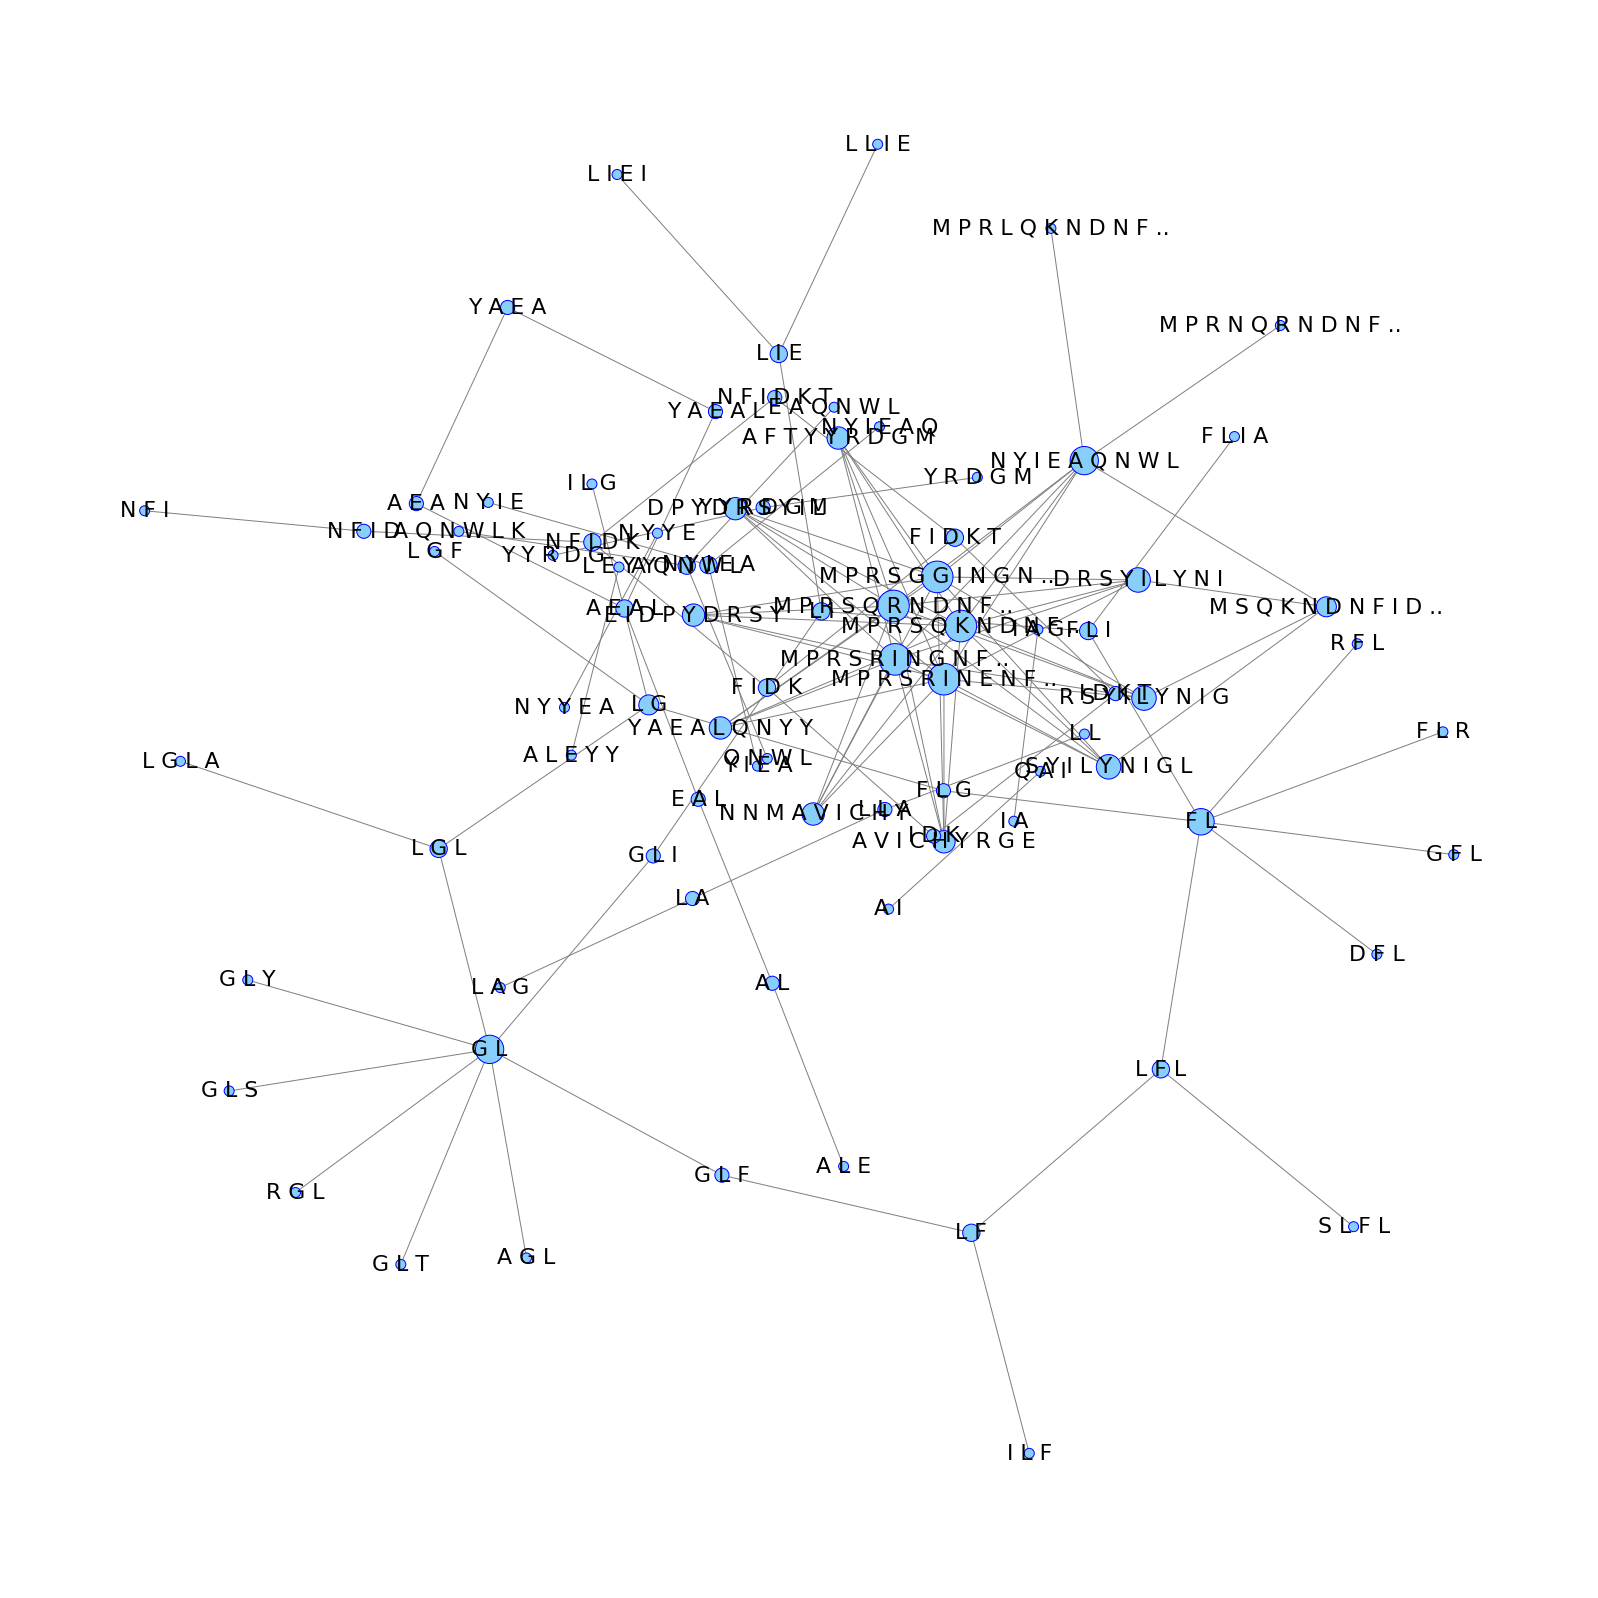

In [73]:
# Layer One - Explicit LDA relationships between sequnces of varying lengths
ff = pd.DataFrame(graph_lst)
ff.columns = ['Target','Source','Weight']
ff = ff[ff['Weight'] > 8] # LDA range [TESTING PHASE]
build_graph_network(ff)

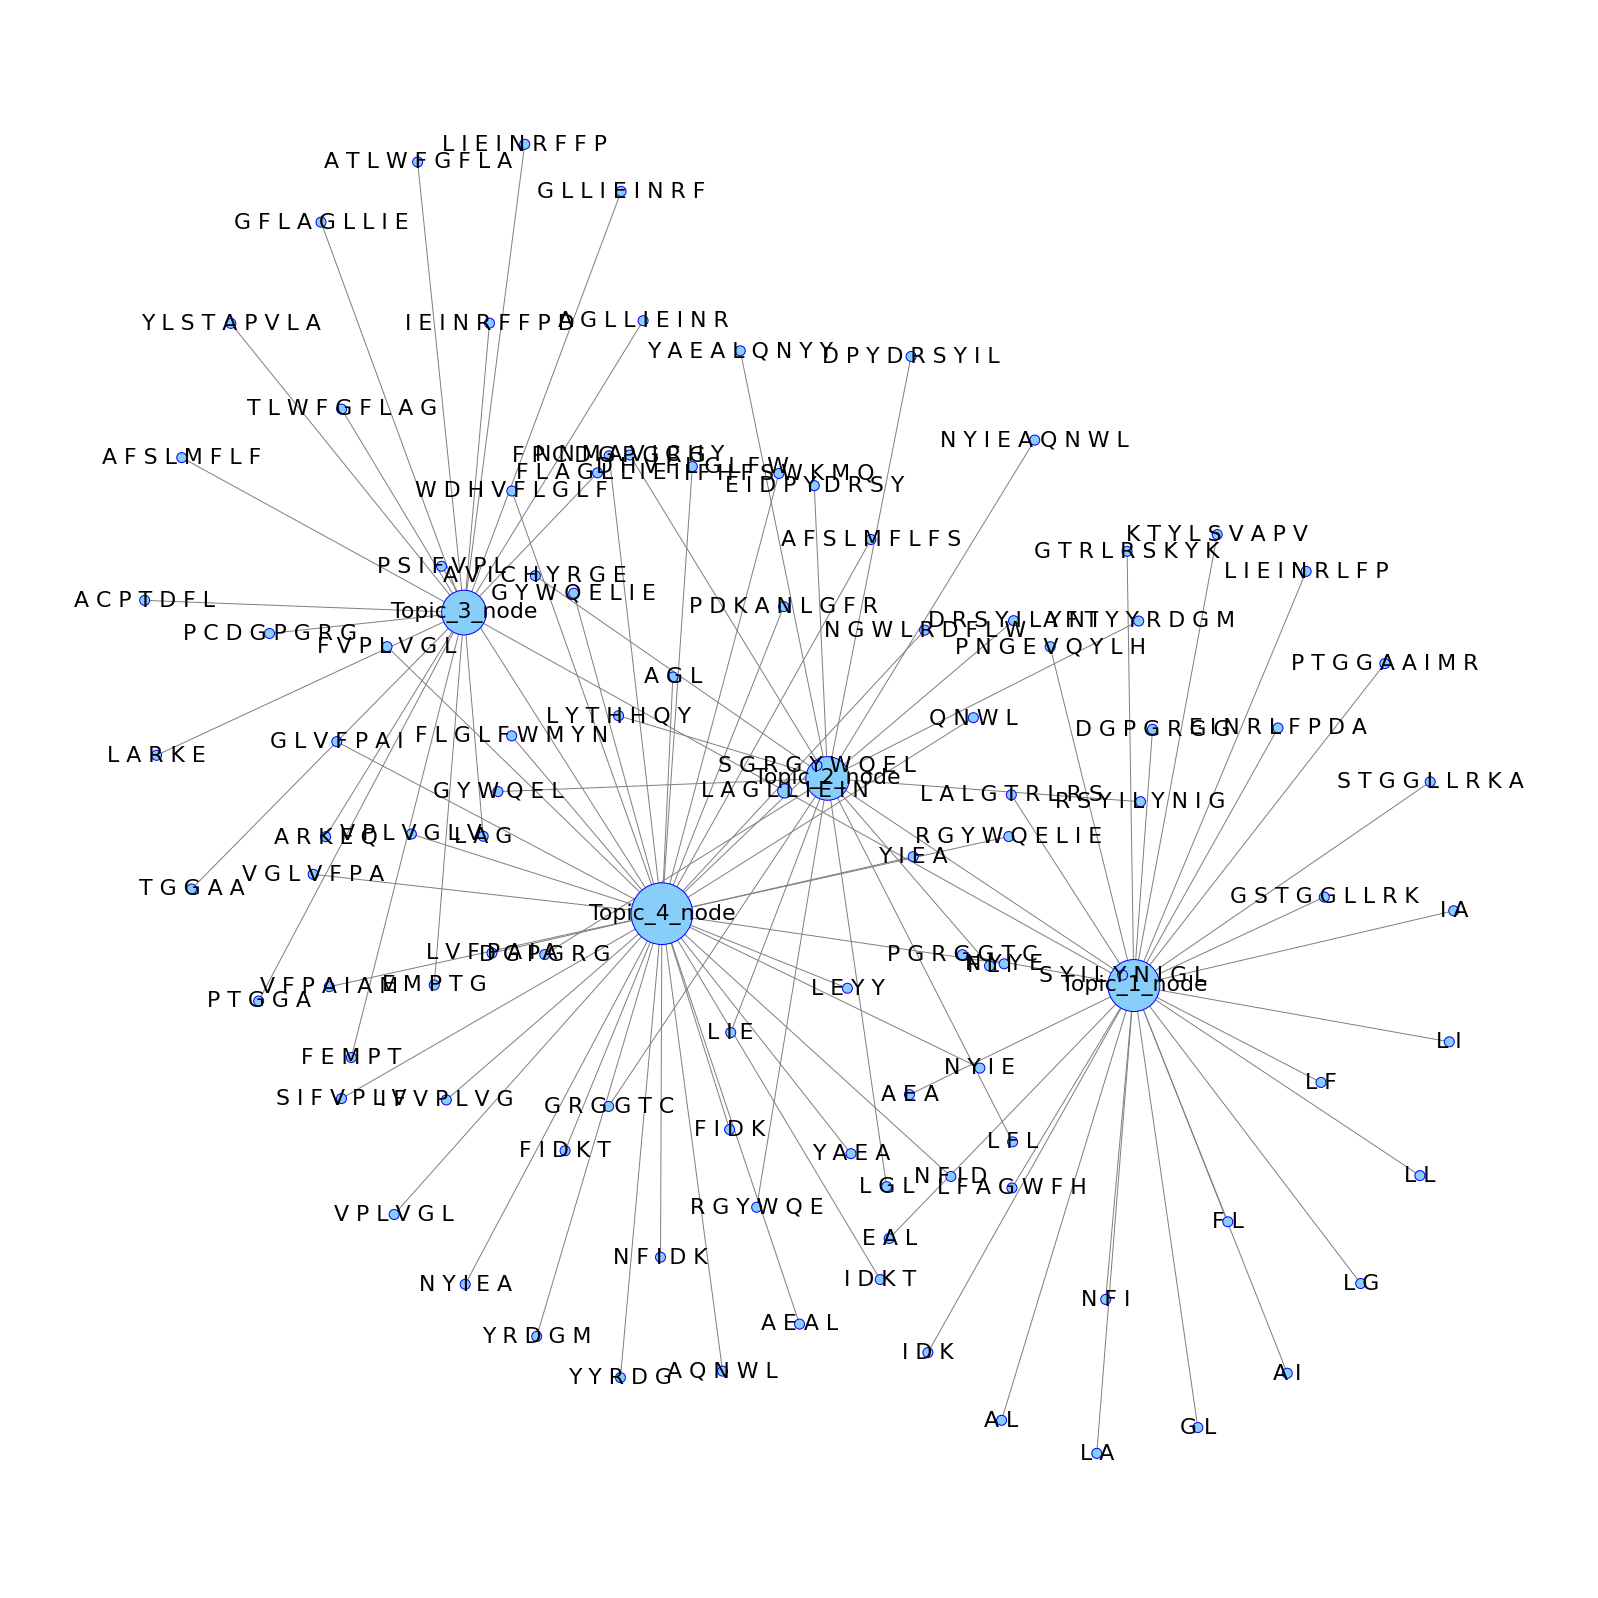

In [74]:
# Layer Two - Implicit LDA relationships between sequnces of varying lengths and their 'attention like' topics that extended between sequence lengths
ff = pd.DataFrame(graph_node_lst)
ff.columns = ['Target','Source','Weight']
ff = ff[ff['Weight'] > 1.5] # LDA range [TESTING PHASE]
build_graph_network(ff)

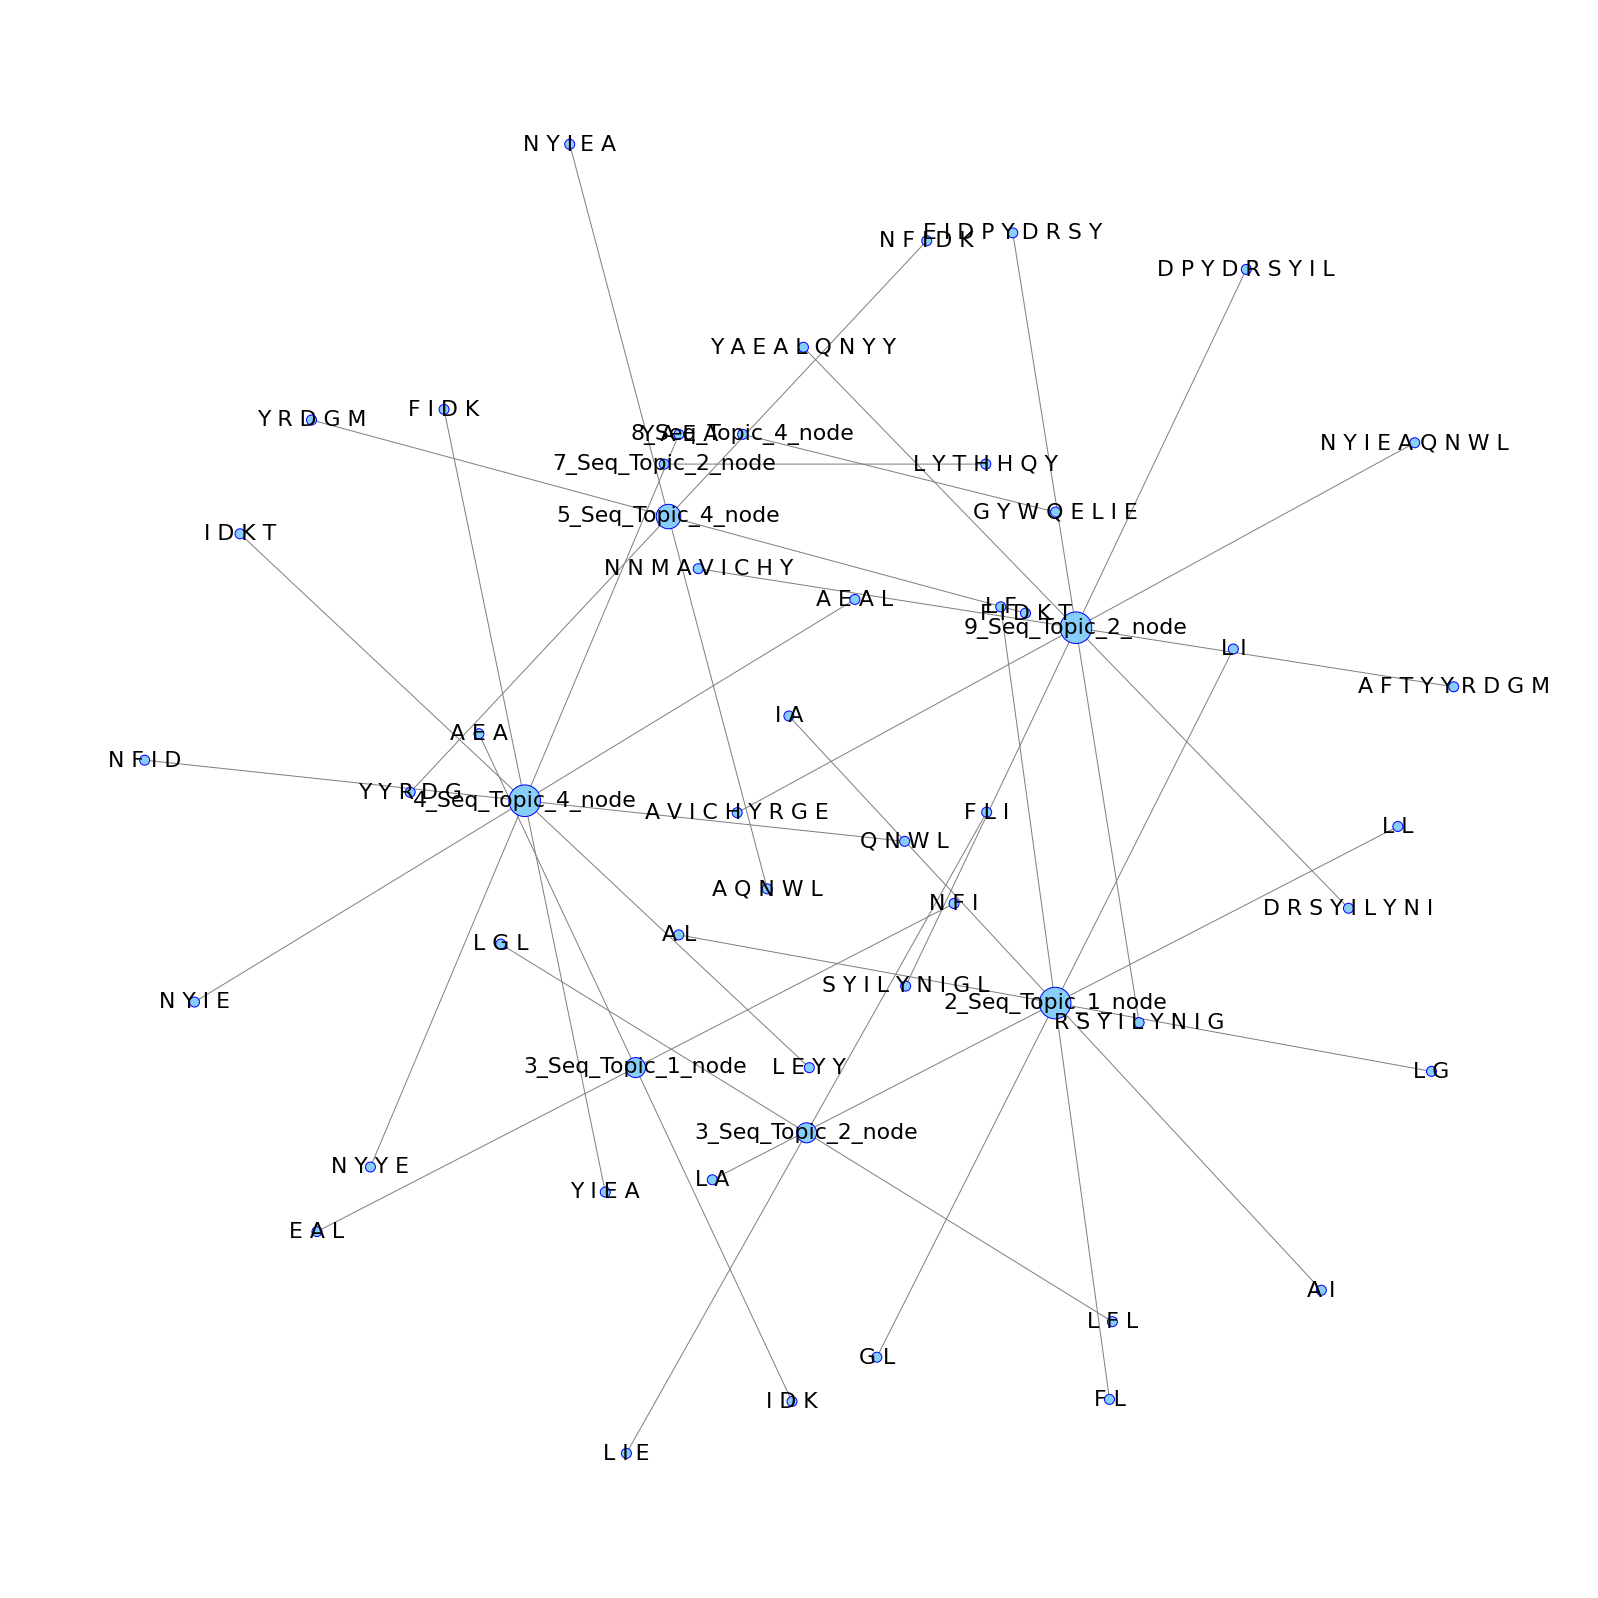

In [75]:
# Layer Three - Implicit LDA relationships between sequnces of varying lengths and their sequence lenth specific
ff = pd.DataFrame(graph_specific_node_lst)
ff.columns = ['Target','Source','Weight']
ff = ff[ff['Weight'] > 6]
gg = build_graph_network(ff)

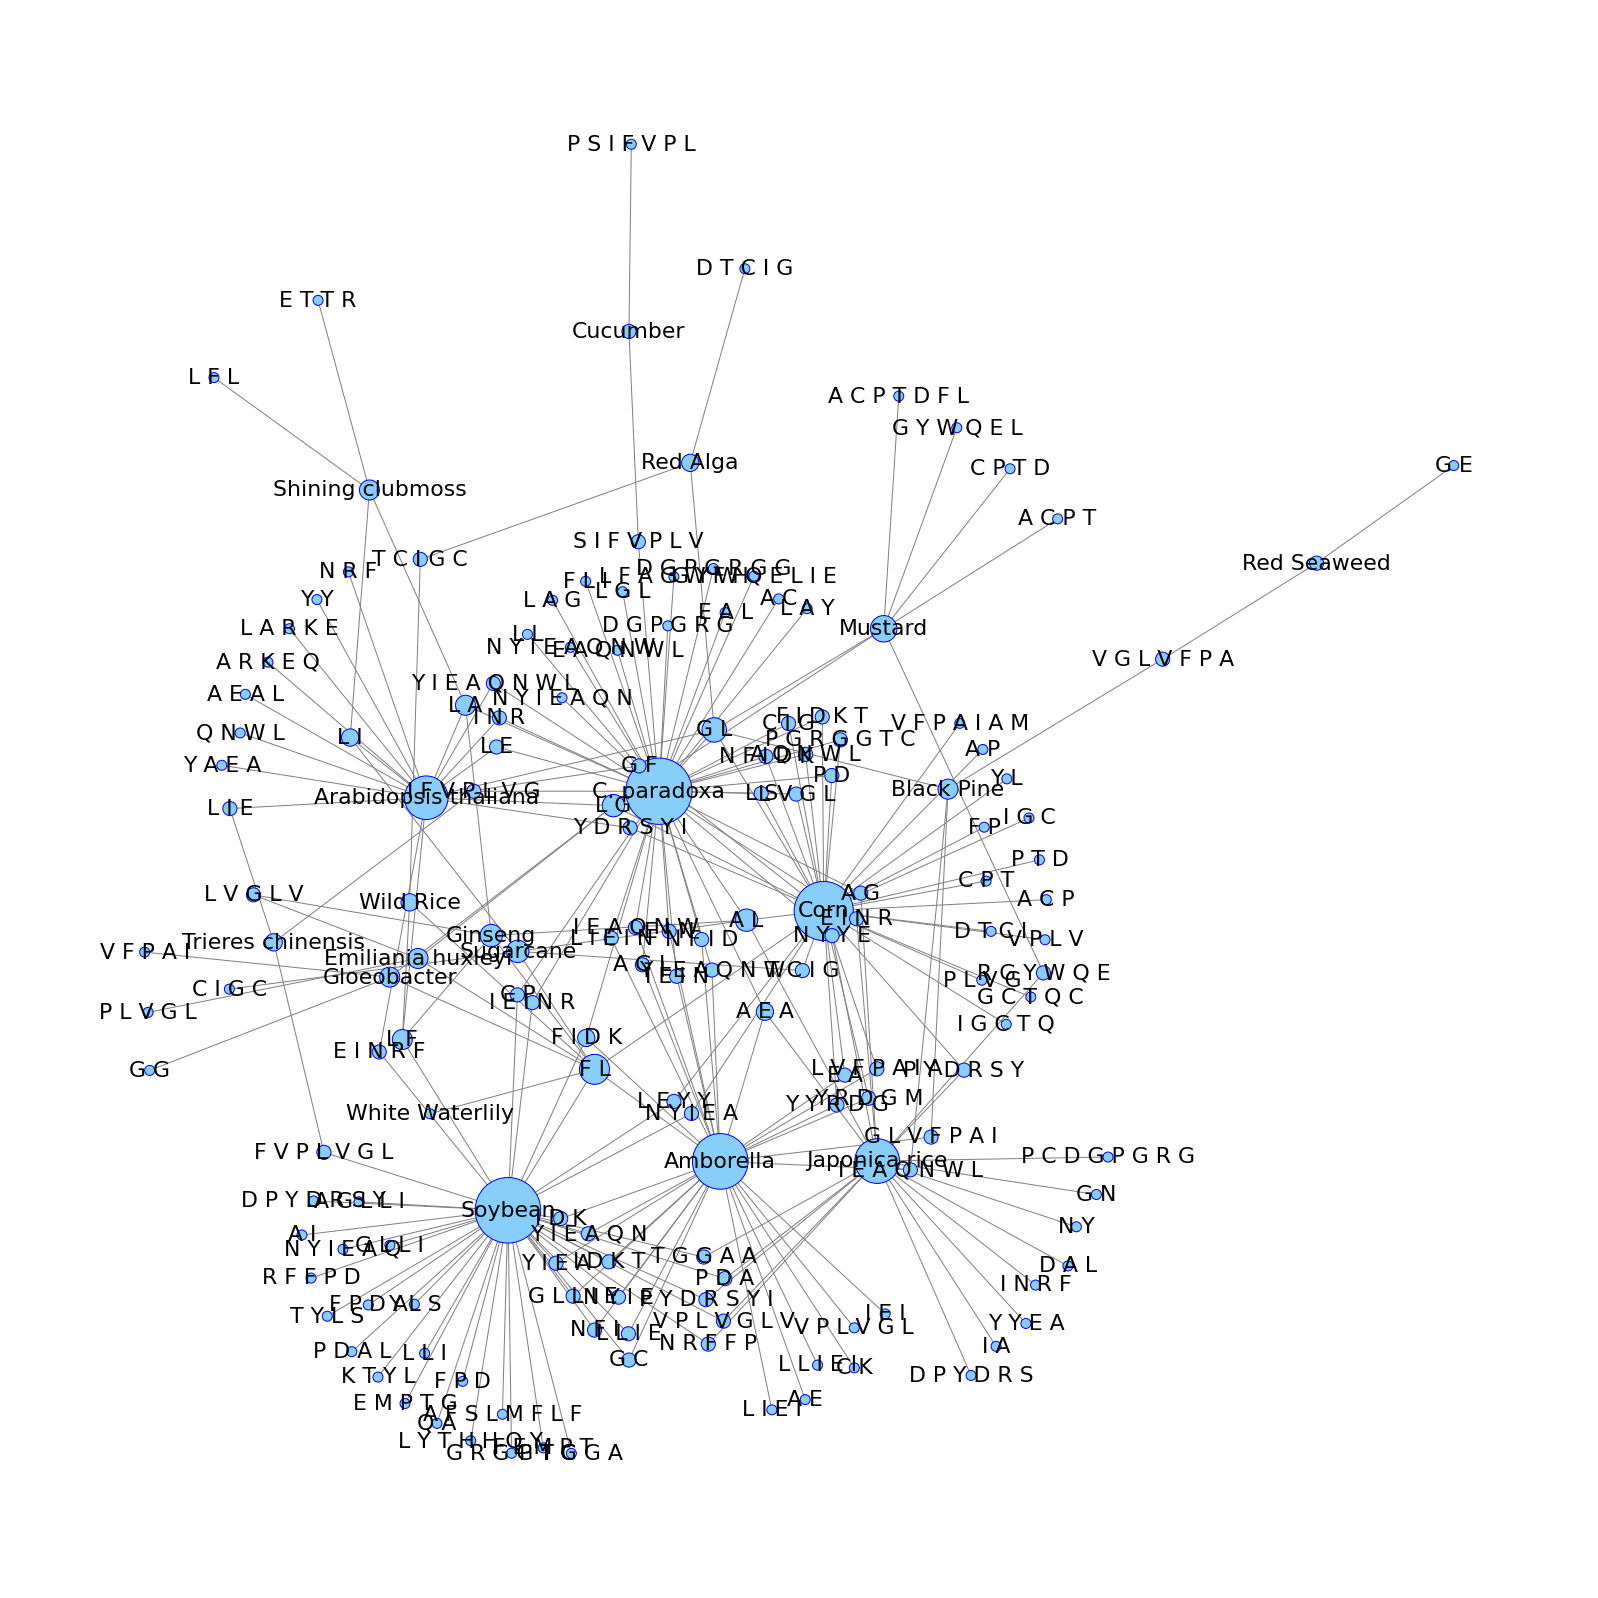

In [76]:
ff = pd.DataFrame(graph_species_generic_node_lst)
ff.columns = ['Target','Source','Weight']
ff = ff[ff['Weight'] > .1]
ff = build_graph_network(ff)


### Shortest Paths between species

In [77]:
# shortest path between species
print(nx.shortest_path(ff, source='Corn', target='Soybean'))
print(nx.shortest_path(ff, source='Shining clubmoss', target='Soybean'))



['Corn', 'L E Y Y', 'Soybean']
['Shining clubmoss', 'L I', 'Arabidopsis thaliana', 'L F', 'Soybean']


In [78]:
# graph to graph isomorhpic testing

# This will be used for attribute matching
em = iso.numerical_edge_match('weight', 1)

print(nx.is_isomorphic(gg, ff))  # no weights considered
#Output: True

print(nx.is_isomorphic(gg, ff, edge_match=em)) # match weights
# Output : False

False
False


('C. paradoxa', 44)


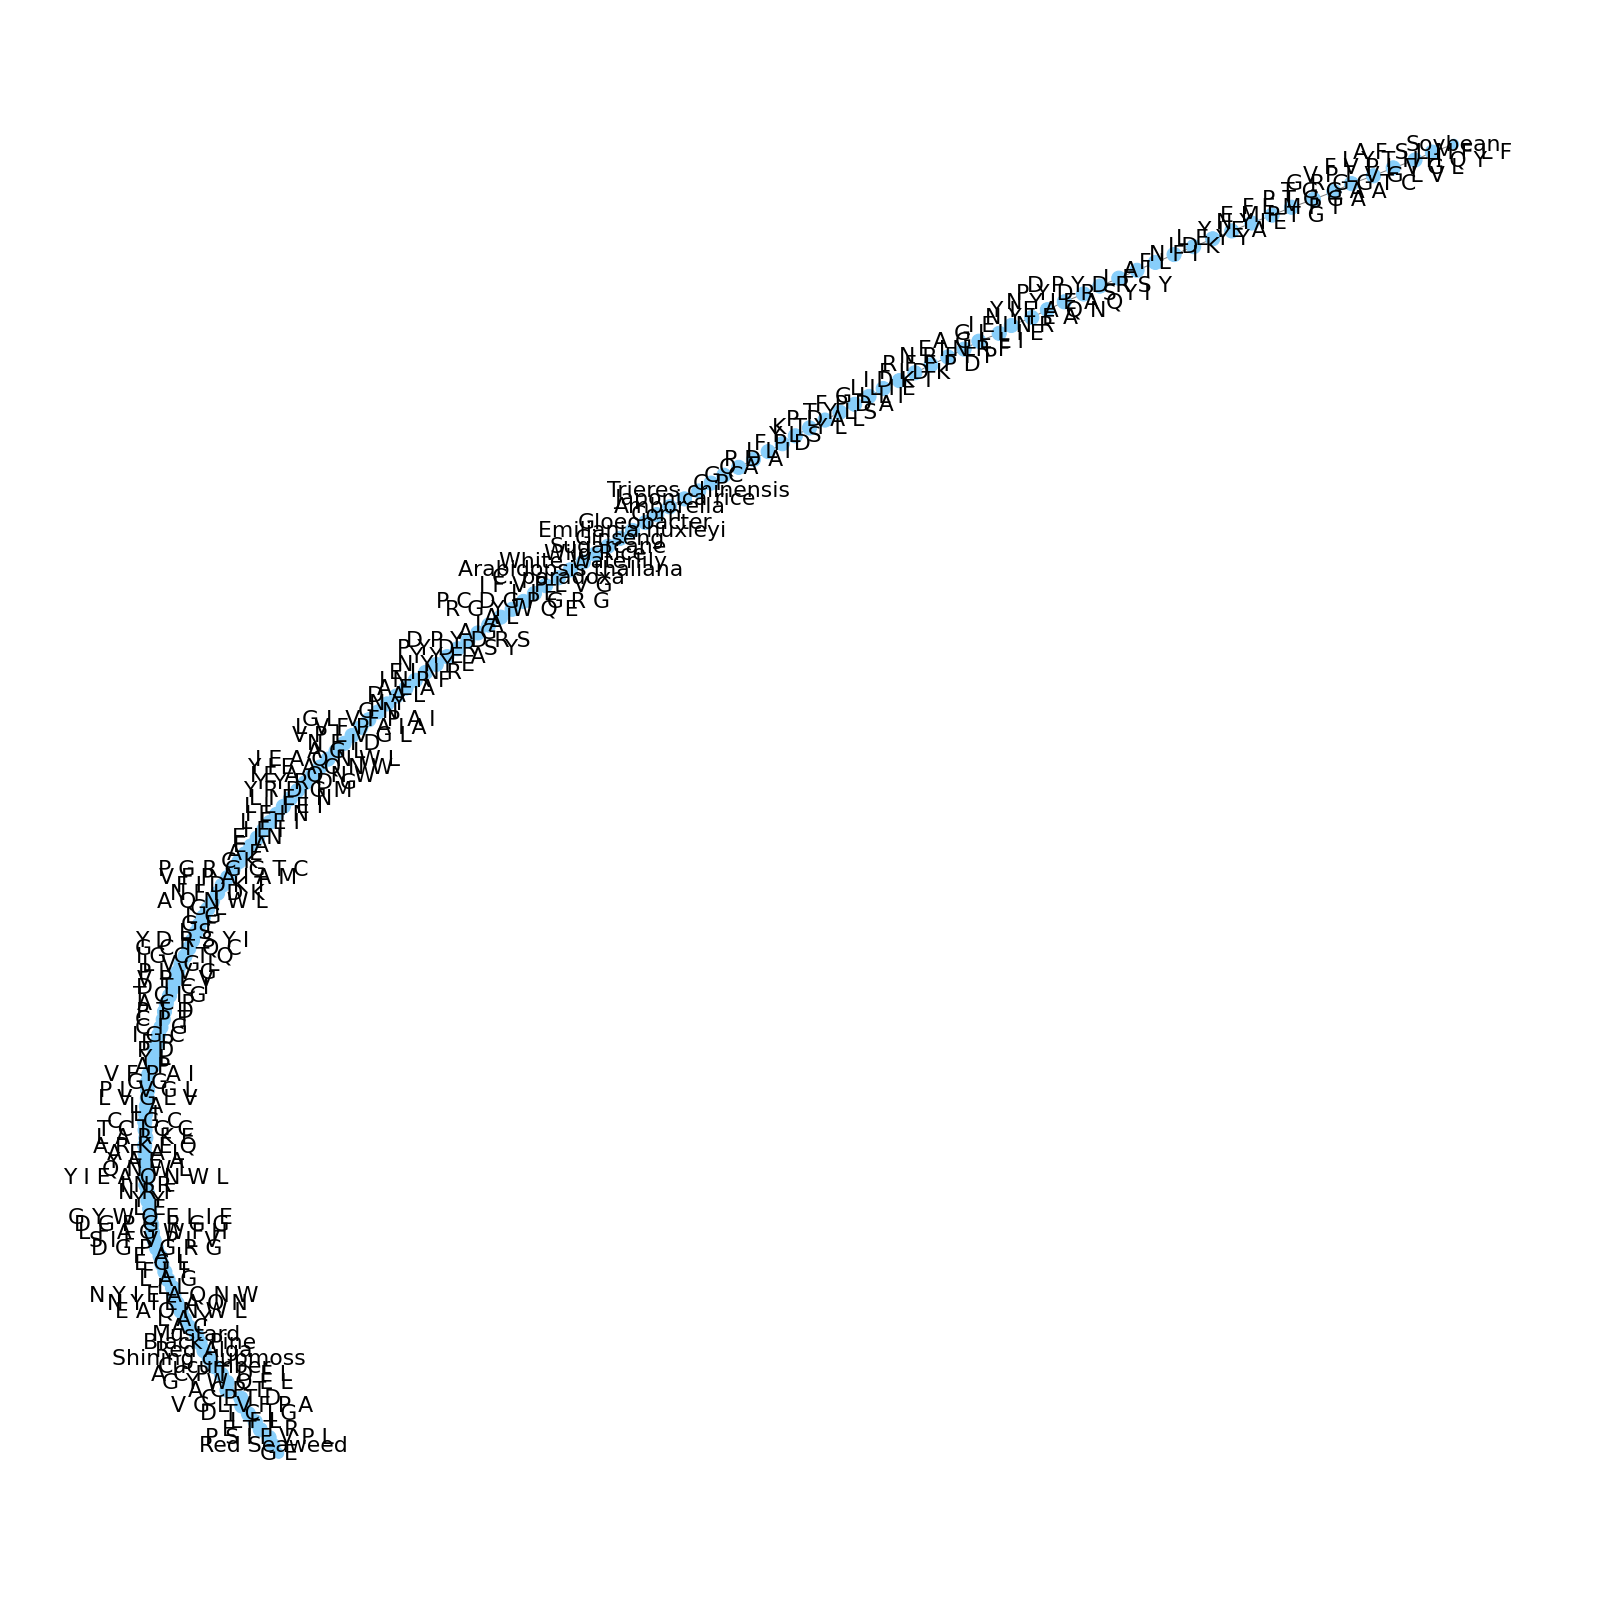

In [79]:

# most connected species
print(max(dict(ff.degree()).items(), key = lambda x : x[1]))

# G1 = nx.path_graph(nx.shortest_path(ff, target='C. paradoxa'))
# G1 = nx.path_graph(nx.shortest_path(ff, source='C. paradoxa'))
# G1 = nx.path_graph(nx.single_target_shortest_path(ff, target='C. paradoxa'))
# G1 = nx.path_graph(nx.shortest_path(ff, target='L A'))
G1 = nx.path_graph(nx.shortest_path(ff, target='Soybean'))
# G1 = nx.path_graph(nx.shortest_path(ff, source='C. paradoxa', target='Soybean'))
# G1 = nx.path_graph(nx.shortest_path(ff, source='C. paradoxa', target='Soybean'))
# G1 = nx.path_graph(nx.jaccard_coefficient(ff))
# G1 = nx.path_graph(nx.jaccard_coefficient(ff, [('C. paradoxa', 'Soybean')]))


plt.figure(3,figsize=(22,22)) 

# calc degrees per node
d = dict(G1.degree)

# visualize graph 
nx.draw(G1         
    ,nx.kamada_kawai_layout(G1)               
    ,with_labels=True
    ,edge_color='gray'
    ,node_color='lightskyblue'
    ,node_size=[v * 100 for v in d.values()]
    ,font_size=22)

('C. paradoxa', 44)


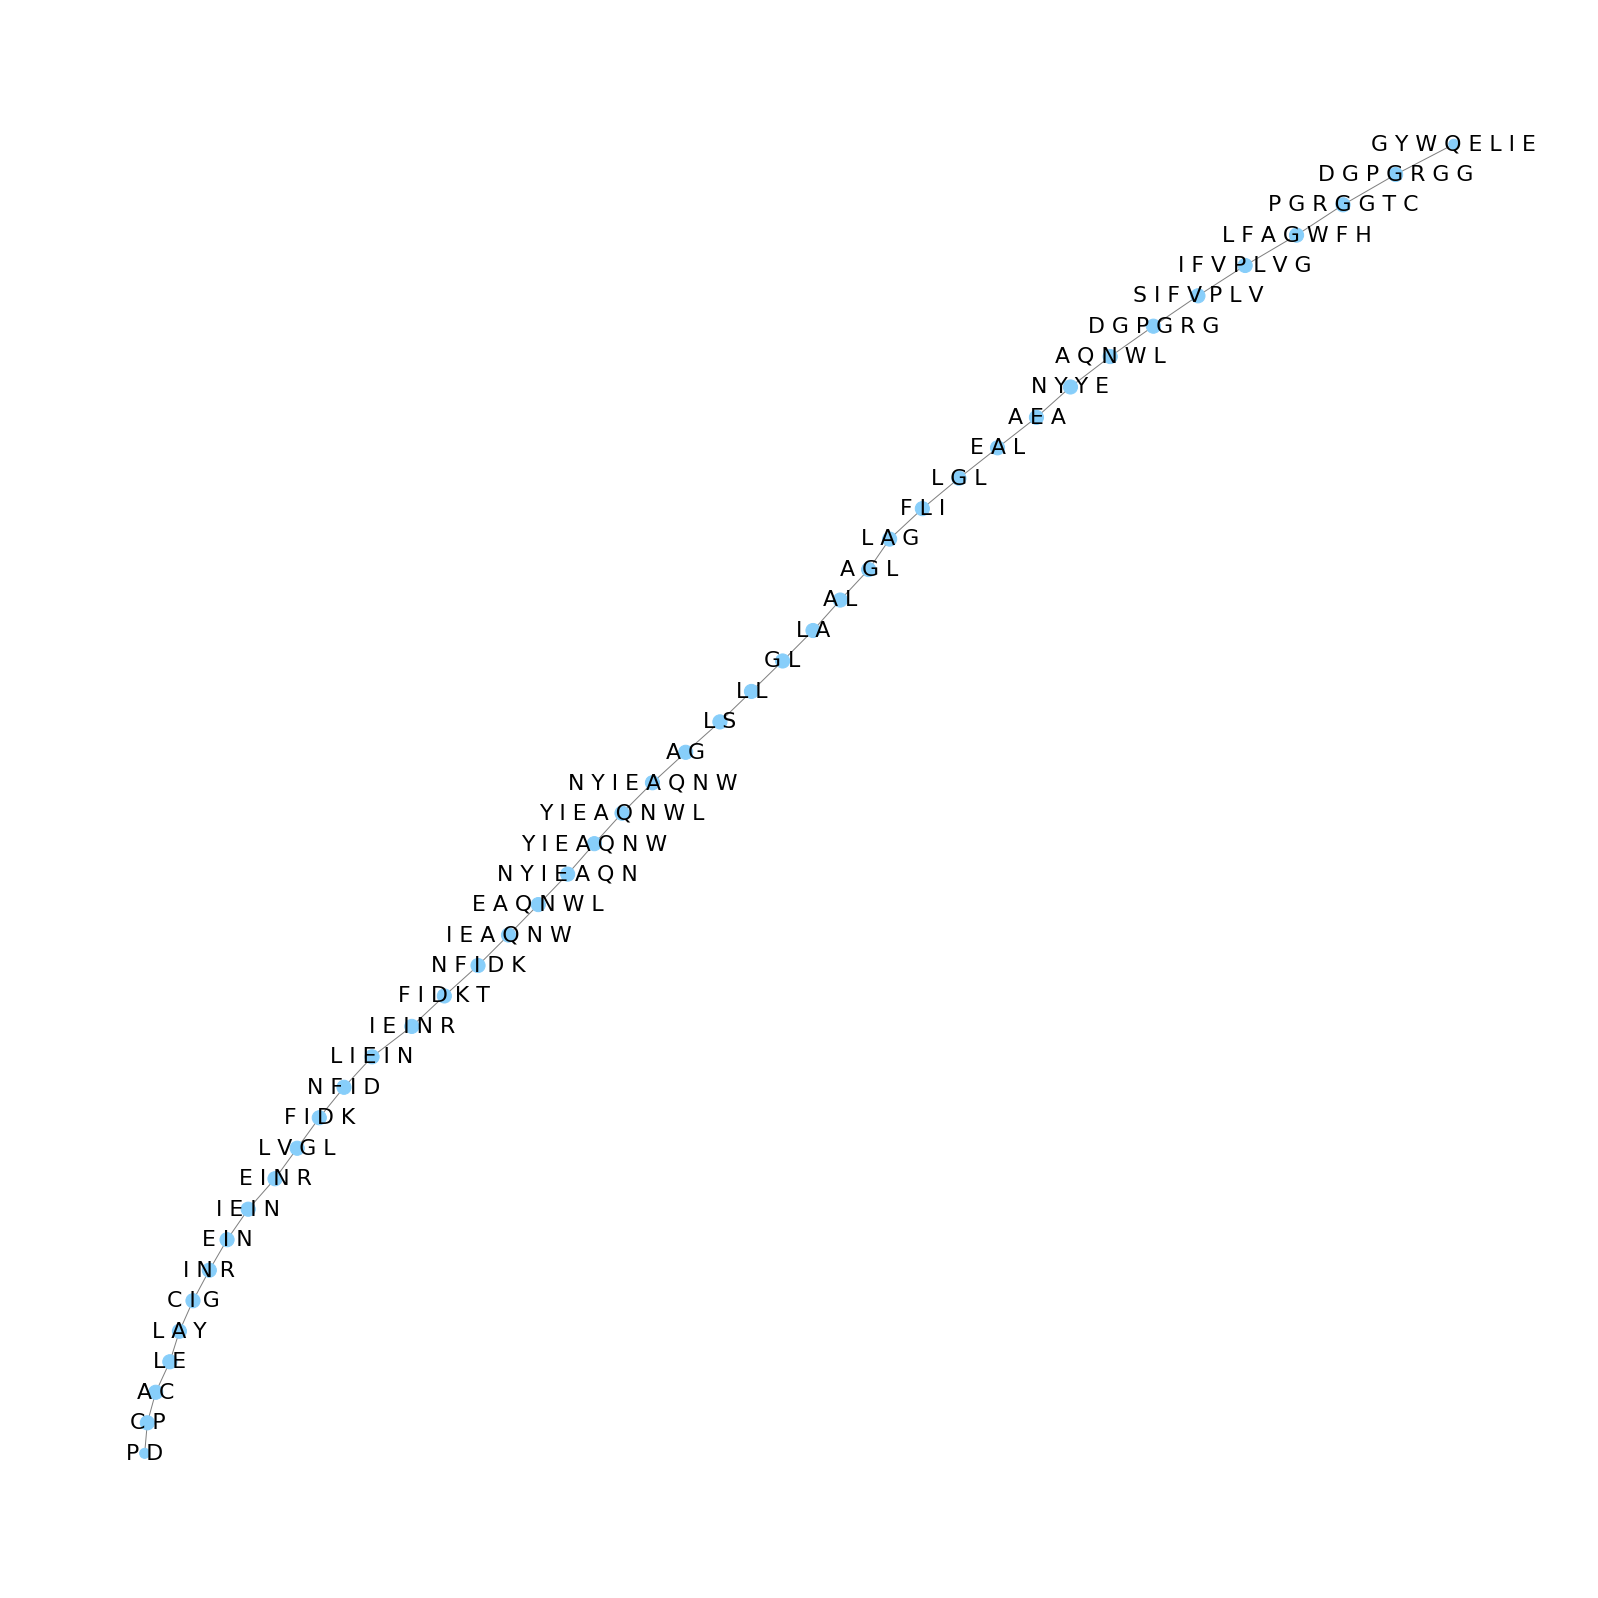

In [80]:
# most connected species
print(max(dict(ff.degree()).items(), key = lambda x : x[1]))


G1 = nx.path_graph(nx.all_neighbors(ff, node='C. paradoxa'))

plt.figure(3,figsize=(22,22)) 

# calc degrees per node
d = dict(G1.degree)

# visualize graph 
nx.draw(G1         
    ,nx.kamada_kawai_layout(G1)               
    ,with_labels=True
    ,edge_color='gray'
    ,node_color='lightskyblue'
    ,node_size=[v * 100 for v in d.values()]
    ,font_size=22)

In [85]:
# Jaccard coefficient of itemsets
buf_ar = []

for u, v, p in nx.jaccard_coefficient(ff):
  # print('(%s, %s) -> %.8f' % (u, v, p))
  buf_ar.append([u, v, p])

jaccard_df = pd.DataFrame(buf_ar)
jaccard_df.columns = ['Source', 'Target', 'Jaccard']
jaccard_df.sort_values('Jaccard', ascending=False)

Source         Target  Jaccard
12292        K T Y L            A I      1.0
503        P T G G A        P D A L      1.0
3139             Y L  V F P A I A M      1.0
2736           C P T        P L V G      1.0
8932   V F P A I A M        P L V G      1.0
...              ...            ...      ...
5264         N Y I E            A G      0.0
5265         N Y I E      Wild Rice      0.0
5267         N Y I E        Y Y E A      0.0
5268         N Y I E        E T T R      0.0
13621          I G C          I D K      0.0

[13622 rows x 3 columns]